# Thinking with Deep Learning: Week 3 Part 1
# Deep Neural Architectures

__Instructor:__ James Evans

__Teaching Assistants & Content Creators/Organisers:__ Bhargav Srinivasa Desikan, Likun Cao

In this week we dive deep into the vast expanse of neural models. Before getting to the technical details and code, a few notes on the organisation of this notebook. The purpose of this notebook is to get you comfortable with the most popular neural network models used today. This isn't a notebook with all the variations of popular models - rather, we introduce a basic layer (e.g RNN), or network structure (e.g wide, deep), or a concept (e.g Attention), or a stack of layers (e.g Encoder or Decoder). Then, we use this aspect to solve a larger problem, ranging from classification to structured prediction. 

**A head's up - this notebook has a lot of code**. That is because each of these models take up a lot of code, and sometimes need a specific way to load the data. Do not be intimidated by the size of the code - most of it is just set-up, and we have tried to comment and give explanations for each other part of the code. Your purpose isn't to master the code, but to understand how to get the data into the models, and what it is inside the model that makes it tick. Most examples in this notebook are adapted from Keras and PyTorch documentation and tutorials, and we have linked to the original code. We have used mutiple packages to showcase these neural models, and also linked to alternatives. It is useful to know how to adapt a variety of implementations of these models, and over the two tutorials this week we would have covered key aspects of deep neural models in both Keras and PyTorch (while providing documentation for both frameworks, where possible). 

**We recommend you to look at the homework at the end of the notebook first, so you can decide how much time you wish to spend on each section.** Pay attention to the kinds of problems which can be solved by each of these networks (e.g CNN for images, AutoEncoders for time series, RNNs for text, etc), and get a feel for the pipelines of using these models to solve problems. Your aim should be able to adapt each of these networks where useful, to your research and datasets of interest. We will also explore the powerful ability of these models to learn useful representations for your data.

LINK TO CELL WITH HOMEWORK: [cell link](https://colab.research.google.com/drive/17361TeE7DRE_qD5QLsFdUuCB_chGbyZh#scrollTo=AsoPcNUFs0Ea&line=1&uniqifier=1)

**In all, we will see implementations of 9 different neural models in this notebook**. Those are a lot of models - we don't recommend having more than one of these models running at a time (though Google Colab Pro will make a difference). So, if you do run the cells through one section, consider saving those results to disk (or take a screenshot, or whatever is useful), restart the Colab session, and go again. Most of the examples are stand-alone, so you don't lose much by skipping a section, though you preview all sections before getting to the HW.

What we expect you to get from this notebook is to understand what a wide variety of models look like, from loading data, building the model, to seeing the results with a given dataset. Where possible, we will try and extract features from the model as well. Examples in this notebook are predominantly in Keras, though we also link to equivalent or related PyTorch tutorials. In the next notebook, we will switch this, with predominantly PyTorch content and links to Keras tutorials. 

Whenever there is a new feature or method introduced in the code, we will do our best to link to an explanation or reference of it, if it is not explained in-line. Once again, the purpose is not to master these models or constructing them - but rather knowing which ones can be useful and where.

Let's begin!
 

## Feedforward Network and Multi Layer Perceptron

We already saw these back in Chapter 1, introduced as our simple, single layer neural network - Feed Forward networks or Multi-layer perceptrons (MLP). Multiple layers of NNs are fully-connected and feed-forward; the output of each neuron in the layer above is directed to every neuron in the layer below. The number of neurons in the input layer is the same as the size of the data. The size of the output layer is set to the number of classes and often provides a probability distribution over the classes by passing the neurons through a softmax function. In a regression setting, the activation function is often a simple linear function or ReLU, and the prediction is a real number instead of a probability distribution and class. 

In the code below, we create a single layer network in Keras and PyTorch, as well as scikit-learn. We do not train these models (refer to [Tut 1.2](https://colab.research.google.com/drive/18NT8eyzhlDN9h-lb6svRsbxJ6r3tPNRU?usp=sharing) for basic training). 



#### Keras


In [ ]:
import keras
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier

In [ ]:
from keras.layers import Dense

In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(200, input_dim=200, activation='relu'))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam")

#### Pytorch

We'll now create the same model in PyTorch.

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(200, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 1)
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [ ]:
net = Network()

In [ ]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))

In [ ]:
criterion = nn.BCELoss()

#### scikit-learn

This is just to show a comparison, as the simplest neural network model. Scikit-learn focuses on machine learning and not deep learning, but the multi-layer perceptron is included as a basic model.

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(200, ), activation='relu')

## Deep Neural Models 

Another network you have already seen in the last chapter, a deep feed forward network is one where we have (usually) more than 2 layers of nodes which are fully connected. The crucial distinction here is that while a shallow network could get away with not needing to backpropagate values through the network, a deep network must crucially be able to do this. It is with the Stochastic Gradient Descent powered backpropagation of values that we are able to change our weights and make DNNs useful, and since then, different kinds of DNNs have been the state of the art. 

The last time we saw deep neural models, we added a single layer to our shallow network (refer to [tut 1.2](https://colab.research.google.com/drive/18NT8eyzhlDN9h-lb6svRsbxJ6r3tPNRU?usp=sharing). In this section, we will try different variations of deeo models, and use the example in the Keras documentation, *Structured data learning with Wide, Deep, and Cross networks* ([Keras - Salama, 2020](https://keras.io/examples/structured_data/wide_deep_cross_networks/)). 

**IMPORTANT NOTE**: this sort of model includes many new topics, so you may not understand every aspect of this model right away. What is important to get from this example, however, is the kind of data we are feeding into the model, the parameters of the model, and the task. In this case, the setting is diverse dataset of forest cover type, using both numerical features and categorical features, and predicting a label over multiple classes. You will often find such scenarios in social sciences datasets, such as census data. Notice the way the data is set up, and the parts of the neural network - the loss function, activation functions, optimisers, and so on. 

This example demonstrates how to do structured data classification using the 
two modeling
techniques. It is highly recommended to skim these two articles before diving in! The description below the model is the abstract. 

1. [Wide & Deep](https://ai.googleblog.com/2016/06/wide-deep-learning-better-together-with.html) models

- The human brain is a sophisticated learning machine, forming rules by memorizing everyday events (“sparrows can fly” and “pigeons can fly”) and generalizing those learnings to apply to things we haven't seen before (“animals with wings can fly”). Perhaps more powerfully, memorization also allows us to further refine our generalized rules with exceptions (“penguins can't fly”). As we were exploring how to advance machine intelligence, we asked ourselves the question—can we teach computers to learn like humans do, by combining the power of memorization and generalization? It's not an easy question to answer, but by jointly training a wide linear model (for memorization) alongside a deep neural network (for generalization), one can combine the strengths of both to bring us one step closer. At Google, we call it Wide & Deep Learning. It's useful for generic large-scale regression and classification problems with sparse inputs (categorical features with a large number of possible feature values), such as recommender systems, search, and ranking problems.

2. [Deep & Cross](https://arxiv.org/abs/1708.05123) models - 

- Feature engineering has been the key to the success of many prediction models. However, the process is nontrivial and often requires manual feature engineering or exhaustive searching. DNNs
are able to automatically learn feature interactions; however, they
generate all interactions implicitly, and are not necessarily efficient in learning all types of cross features. In this paper, we propose the Deep & Cross Network (DCN) which keeps the benefits of
a DNN model, and beyond that, it introduces a novel cross network
more efficient in learning certain bounded-degree feature
interactions. In particular, DCN explicitly applies feature crossing
at each layer, requires no manual feature engineering, and adds
negligible extra complexity to the DNN model. Our experimental
results have demonstrated its superiority over the state-of-art algorithms on the CTR prediction dataset and dense classification
dataset, in terms of both model accuracy and memory usage.


### The dataset

This example uses the [Covertype](https://archive.ics.uci.edu/ml/datasets/covertype) dataset from the UCI
Machine Learning Repository. The task is to predict forest cover type from cartographic variables.
The dataset includes 506,011 instances with 12 input features: 10 numerical features and 2
categorical features. Each instance is categorized into 1 of 7 classes, and is **multilabel classification task**. Even though the dataset isn't social scientific, it combines both numerical values and categorical features, which is something you might be dealing with often.

In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Prepare the data

First, let's load the dataset from the UCI Machine Learning Repository into a Pandas
DataFrame:

In [ ]:
data_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
)
raw_data = pd.read_csv(data_url, header=None)
print(f"Dataset shape: {raw_data.shape}")
raw_data.head()

Dataset shape: (581012, 55)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


The two categorical features in the dataset are binary-encoded.
We will convert this dataset representation to the typical representation, where each
categorical feature is represented as a single integer value.

In [ ]:
soil_type_values = [f"soil_type_{idx+1}" for idx in range(40)]
wilderness_area_values = [f"area_type_{idx+1}" for idx in range(4)]

soil_type = raw_data.loc[:, 14:53].apply(
    lambda x: soil_type_values[0::1][x.to_numpy().nonzero()[0][0]], axis=1
)
wilderness_area = raw_data.loc[:, 10:13].apply(
    lambda x: wilderness_area_values[0::1][x.to_numpy().nonzero()[0][0]], axis=1
)

CSV_HEADER = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points",
    "Wilderness_Area",
    "Soil_Type",
    "Cover_Type",
]

data = pd.concat(
    [raw_data.loc[:, 0:9], wilderness_area, soil_type, raw_data.loc[:, 54]],
    axis=1,
    ignore_index=True,
)
data.columns = CSV_HEADER

# Convert the target label indices into a range from 0 to 6 (there are 7 labels in total).
data["Cover_Type"] = data["Cover_Type"] - 1

print(f"Dataset shape: {data.shape}")
data.head().T

Dataset shape: (581012, 13)


,0,1,2,3,4
Elevation,2596,2590,2804,2785,2595
Aspect,51,56,139,155,45
Slope,3,2,9,18,2
Horizontal_Distance_To_Hydrology,258,212,268,242,153
Vertical_Distance_To_Hydrology,0,-6,65,118,-1
Horizontal_Distance_To_Roadways,510,390,3180,3090,391
Hillshade_9am,221,220,234,238,220
Hillshade_Noon,232,235,238,238,234
Hillshade_3pm,148,151,135,122,150
Horizontal_Distance_To_Fire_Points,6279,6225,6121,6211,6172


The shape of the DataFrame shows there are 13 columns per sample
(12 for the features and 1 for the target label).

Let's split the data into training (85%) and test (15%) sets.

In [ ]:
train_splits = []
test_splits = []

for _, group_data in data.groupby("Cover_Type"):
    random_selection = np.random.rand(len(group_data.index)) <= 0.85
    train_splits.append(group_data[random_selection])
    test_splits.append(group_data[~random_selection])

train_data = pd.concat(train_splits).sample(frac=1).reset_index(drop=True)
test_data = pd.concat(test_splits).sample(frac=1).reset_index(drop=True)

print(f"Train split size: {len(train_data.index)}")
print(f"Test split size: {len(test_data.index)}")

Train split size: 493900
Test split size: 87112


Next, store the training and test data in separate CSV files.

In [ ]:
train_data_file = "train_data.csv"
test_data_file = "test_data.csv"

train_data.to_csv(train_data_file, index=False)
test_data.to_csv(test_data_file, index=False)

### Define dataset metadata

Here, we define the metadata of the dataset that will be useful for reading and parsing
the data into input features, and encoding the input features with respect to their types.

In [ ]:
TARGET_FEATURE_NAME = "Cover_Type"

TARGET_FEATURE_LABELS = ["0", "1", "2", "3", "4", "5", "6"]

NUMERIC_FEATURE_NAMES = [
    "Aspect",
    "Elevation",
    "Hillshade_3pm",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Horizontal_Distance_To_Fire_Points",
    "Horizontal_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Slope",
    "Vertical_Distance_To_Hydrology",
]

CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    "Soil_Type": list(data["Soil_Type"].unique()),
    "Wilderness_Area": list(data["Wilderness_Area"].unique()),
}

CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())

FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES

COLUMN_DEFAULTS = [
    [0] if feature_name in NUMERIC_FEATURE_NAMES + [TARGET_FEATURE_NAME] else ["NA"]
    for feature_name in CSV_HEADER
]

NUM_CLASSES = len(TARGET_FEATURE_LABELS)

### Experiment setup

Next, let's define an input function that reads and parses the file, then converts features
and labels into a[`tf.data.Dataset`](https://www.tensorflow.org/guide/datasets)
for training or evaluation.

In [ ]:
def get_dataset_from_csv(csv_file_path, batch_size, shuffle=False):

    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=CSV_HEADER,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=True,
        shuffle=shuffle,
    )
    return dataset.cache()


Here we configure the parameters and implement the procedure for running a training and
evaluation experiment given a model. Note the optimizer (and learning rate), loss, metrics. The rest of the code just sets up the training and testing parts of the dataset, fits and evaluates it.

In [ ]:
learning_rate = 0.001
dropout_rate = 0.1
batch_size = 265
num_epochs = 50

hidden_units = [32, 32]


def run_experiment(model):

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )

    train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)

    test_dataset = get_dataset_from_csv(test_data_file, batch_size)

    print("Start training the model...")
    history = model.fit(train_dataset, epochs=num_epochs)
    print("Model training finished")

    _, accuracy = model.evaluate(test_dataset, verbose=0)

    print(f"Test accuracy: {round(accuracy * 100, 2)}%")


### Create model inputs

Now, define the inputs for the models as a dictionary, where the key is the feature name,
and the value is a `keras.layers.Input` tensor with the corresponding feature shape
and data type.

In [ ]:

def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.float32
            )
        else:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.string
            )
    return inputs


### Encode features

We create two representations of our input features: sparse and dense:
1. In the **sparse** representation, the categorical features are encoded with one-hot
encoding using the `CategoryEncoding` layer. This representation can be useful for the
model to *memorize* particular feature values to make certain predictions.
2. In the **dense** representation, the categorical features are encoded with
low-dimensional embeddings using the `Embedding` layer. This representation helps
the model to *generalize* well to unseen feature combinations.

In [ ]:

from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_inputs(inputs, use_embedding=False):
    encoded_features = []
    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]
            # Create a lookup to convert string values to an integer indices.
            # Since we are not using a mask token nor expecting any out of vocabulary
            # (oov) token, we set mask_token to None and  num_oov_indices to 0.
            index = StringLookup(
                vocabulary=vocabulary, mask_token=None, num_oov_indices=0
            )
            # Convert the string input values into integer indices.
            value_index = index(inputs[feature_name])
            if use_embedding:
                embedding_dims = int(math.sqrt(len(vocabulary)))
                # Create an embedding layer with the specified dimensions.
                embedding_ecoder = layers.Embedding(
                    input_dim=len(vocabulary), output_dim=embedding_dims
                )
                # Convert the index values to embedding representations.
                encoded_feature = embedding_ecoder(value_index)
            else:
                # Create a one-hot encoder.
                onehot_encoder = CategoryEncoding(output_mode="binary")
                onehot_encoder.adapt(index(vocabulary))
                # Convert the index values to a one-hot representation.
                encoded_feature = onehot_encoder(value_index)
        else:
            # Use the numerical features as-is.
            encoded_feature = tf.expand_dims(inputs[feature_name], -1)

        encoded_features.append(encoded_feature)

    all_features = layers.concatenate(encoded_features)
    return all_features


### Experiment 1: a baseline model

In the first experiment, let's create a multi-layer feed-forward network,
where the categorical features are one-hot encoded. 

**Note**: Some new terms here! We see a Batch Normalisation layer. We will encounter these in our second notebook on regularisation, but for a brief explanation:

Batch normalization tries to reduce the “internal covariate shift” between training and testing data. Internal covariate shift is the change in the distribution of network activations due to the change in paramaters during training. In neural networks, the output of the first layer feeds into the second layer, the output of the second layer feeds into the third, and so on. When the parameters of a layer change, so does the distribution of inputs to subsequent layers. These shifts in input distributions can be problematic for neural networks, especially deep neural networks that could have a large number of layers. Batch normalization tries to mitigate this. You can check out [this](https://arxiv.org/abs/1502.03167) paper where the idea of mitigating internal covariance shift with batch normalization was first introduced. 

We also see Dropout, another term from the regularisation universe. Dropout involves injecting noise while computing each internal layer during forward propagation. The method is called dropout because we literally drop out some neurons during training. Throughout training, on each iteration, standard dropout consists of zeroing out some fraction of the nodes in each layer before calculating the subsequent layer.

![Dropout](https://d2l.ai/_images/dropout2.svg)


**We will revisit these topics, but in PyTorch, and in the next tutorial.**


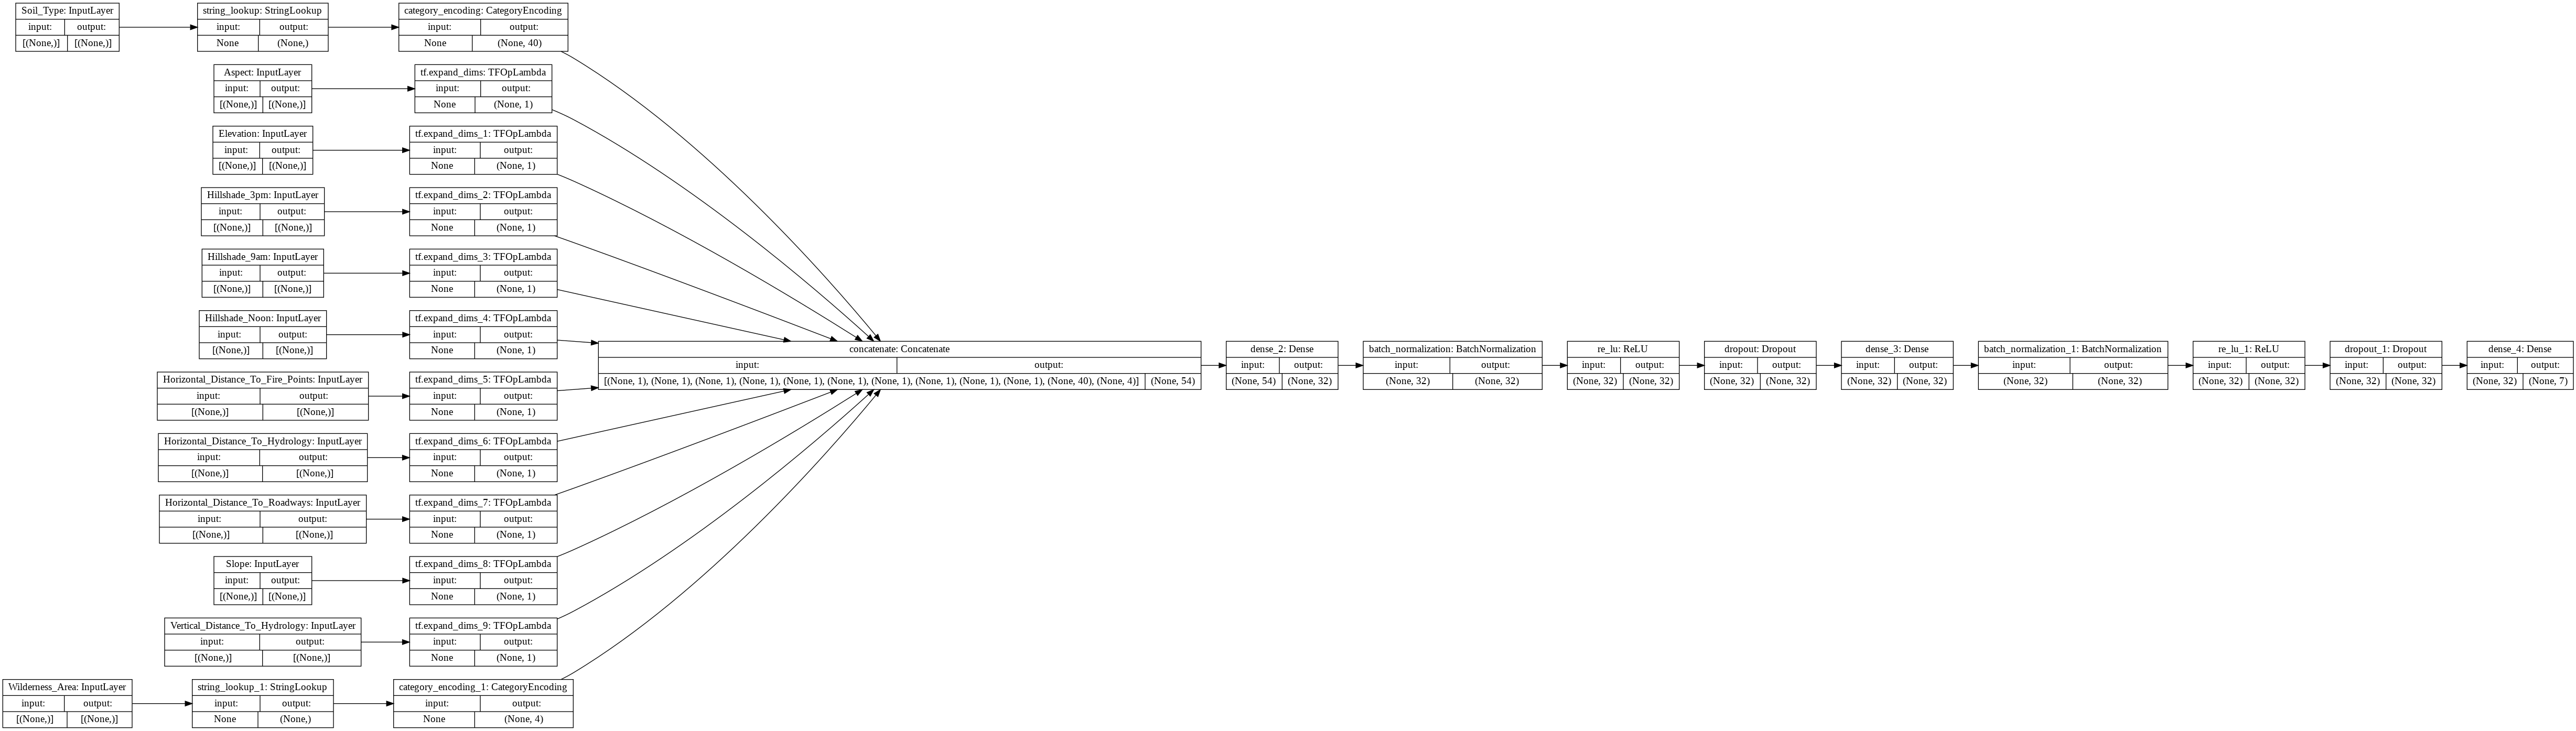

In [ ]:

def create_baseline_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)
    # hidden_units is (32, 32)
    # we pass the features from one layer to the next, applying normalisations, activations and dropout after passing it through the 
    for units in hidden_units:
        features = layers.Dense(units)(features)
        features = layers.BatchNormalization()(features)
        features = layers.ReLU()(features)
        features = layers.Dropout(dropout_rate)(features)

    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


baseline_model = create_baseline_model()
keras.utils.plot_model(baseline_model, show_shapes=True, rankdir="LR")

Let's run it:

In [ ]:
run_experiment(baseline_model)

Start training the model...
Epoch 1/50
1864/1864 [==============================] - 11s 5ms/step - loss: 0.9980 - sparse_categorical_accuracy: 0.6020
Epoch 2/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.6782 - sparse_categorical_accuracy: 0.7099
Epoch 3/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.6487 - sparse_categorical_accuracy: 0.7218
Epoch 4/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.6289 - sparse_categorical_accuracy: 0.7302
Epoch 5/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.6140 - sparse_categorical_accuracy: 0.7367
Epoch 6/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.6037 - sparse_categorical_accuracy: 0.7405
Epoch 7/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.5951 - sparse_categorical_accuracy: 0.7442
Epoch 8/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.5889 - sparse_categorical_accuracy: 0.7454
Epo

The baseline linear model achieves ~76% test accuracy.

### Experiment 2: Wide & Deep model

In the second experiment, we create a Wide & Deep model. The wide part of the model
a linear model, while the deep part of the model is a multi-layer feed-forward network.

Use the sparse representation of the input features in the wide part of the model and the
dense representation of the input features for the deep part of the model.

Note that every input features contributes to both parts of the model with different
representations. You can see that we merge the layers near the end before reaching the output of the model. 

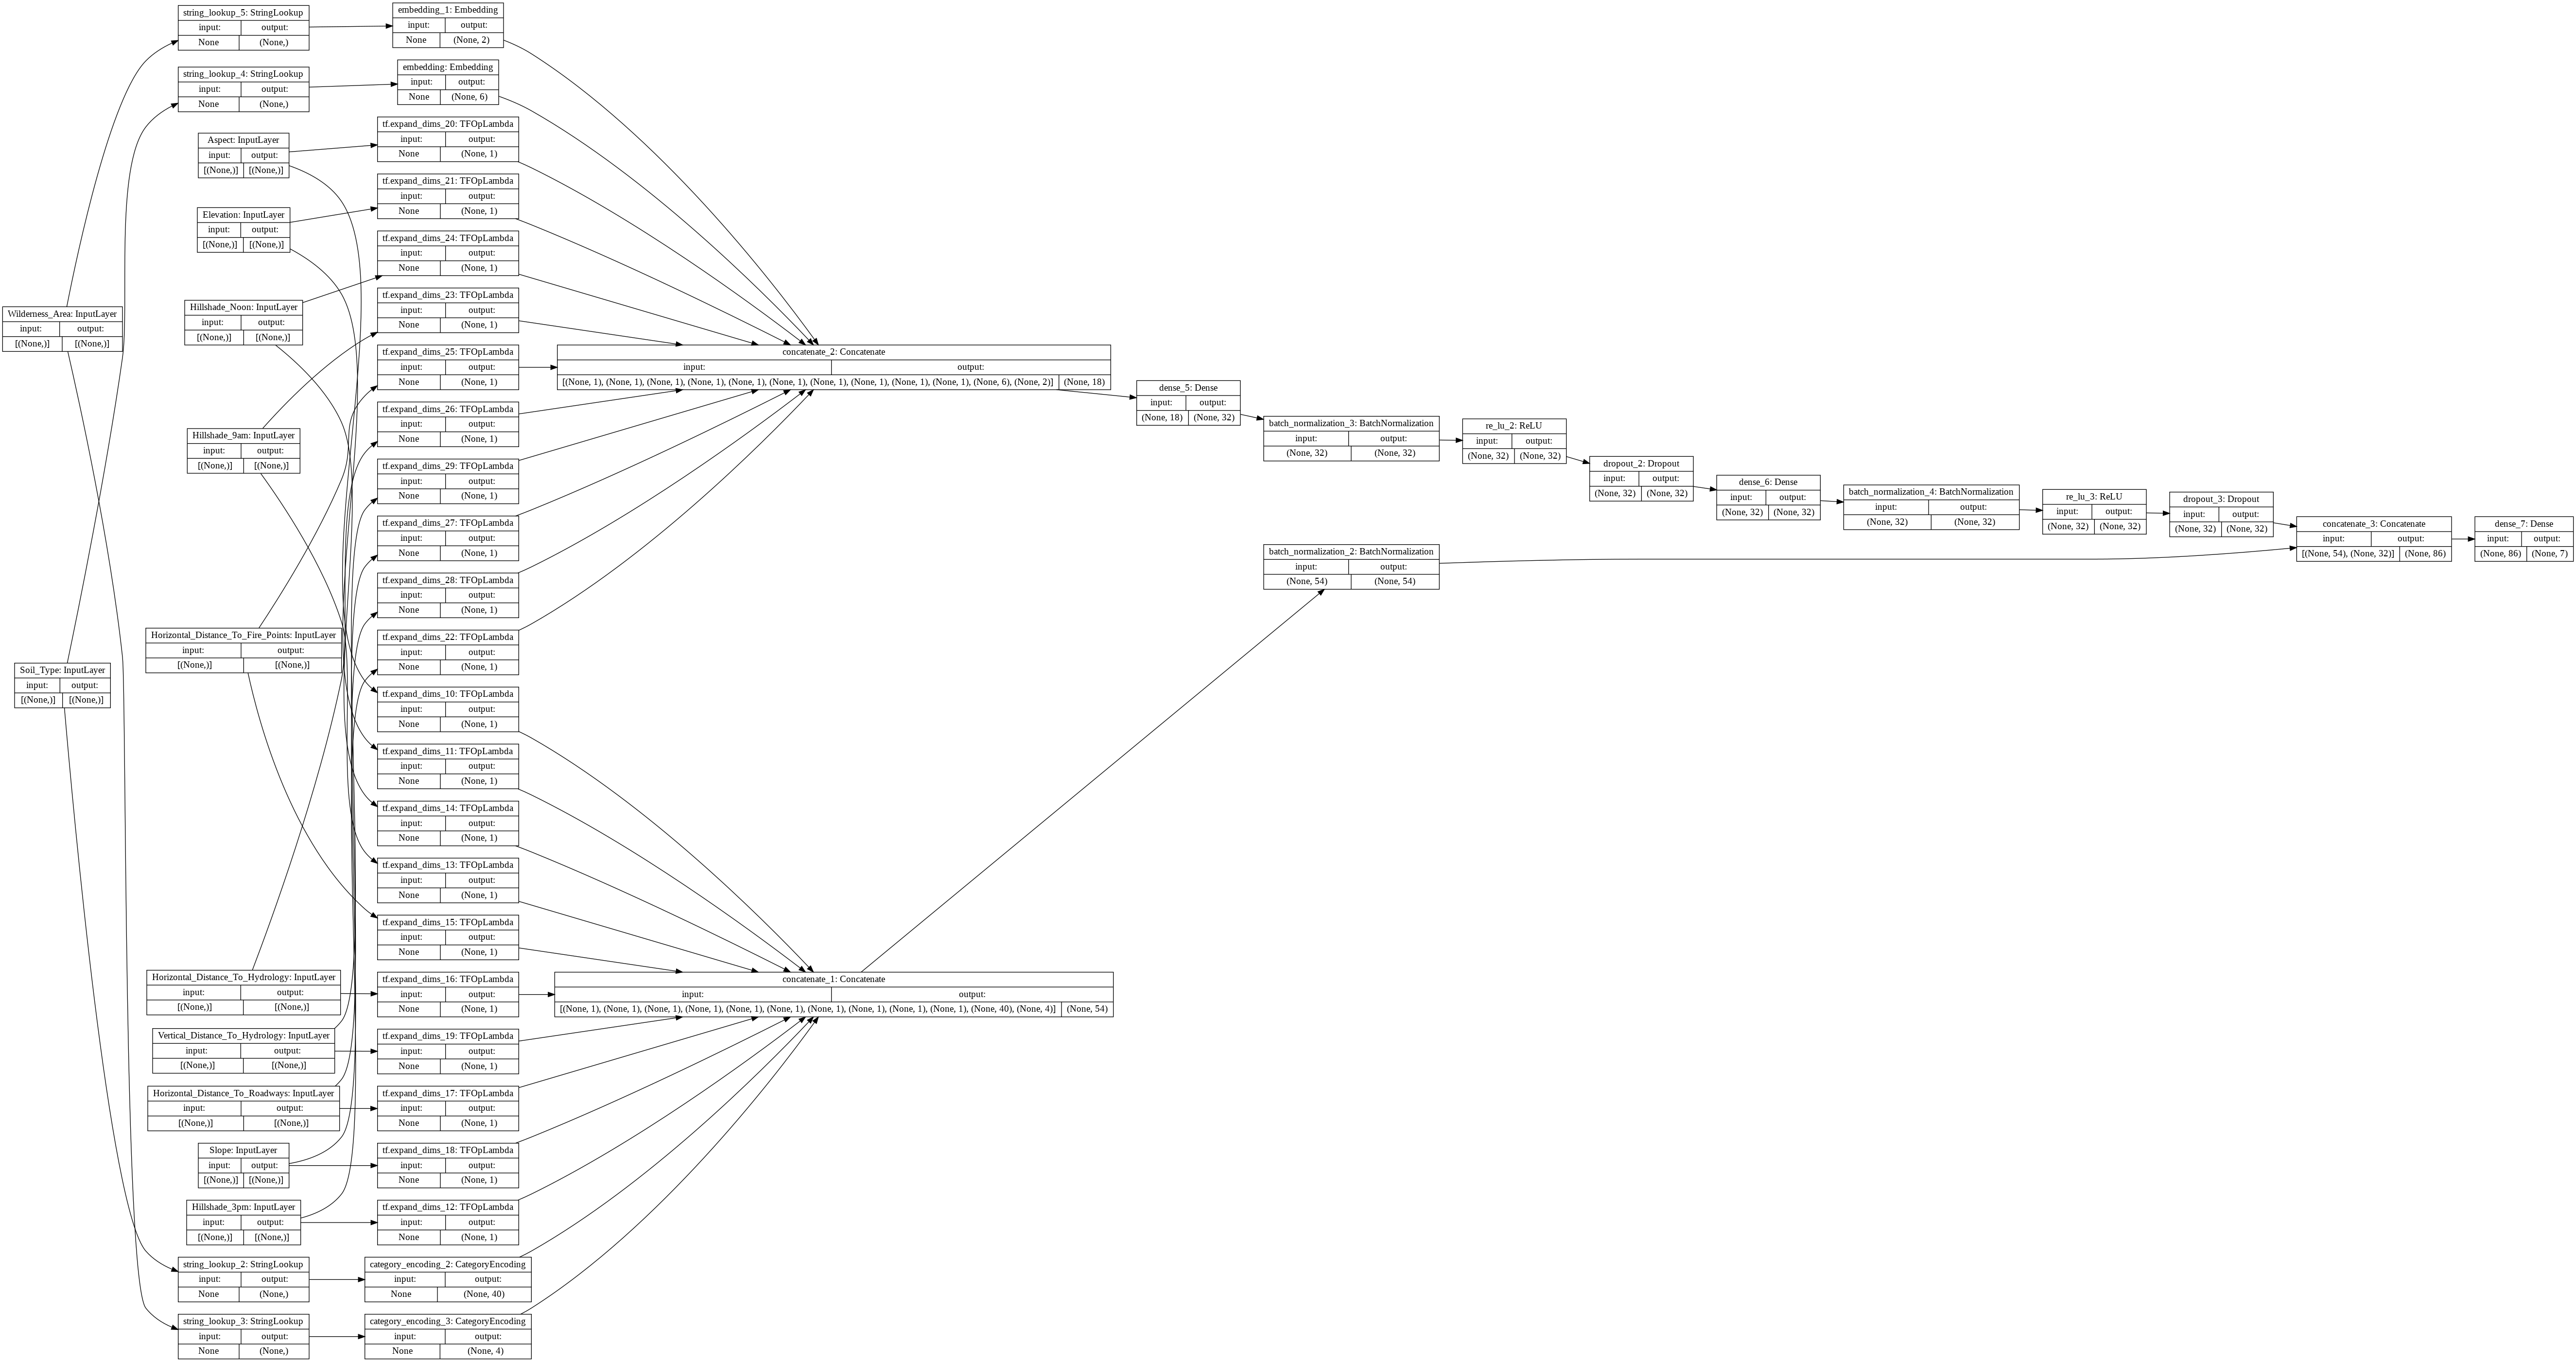

In [ ]:
def create_wide_and_deep_model():

    inputs = create_model_inputs()
    wide = encode_inputs(inputs)
    wide = layers.BatchNormalization()(wide)

    deep = encode_inputs(inputs, use_embedding=True)
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        deep = layers.Dropout(dropout_rate)(deep)

    merged = layers.concatenate([wide, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


wide_and_deep_model = create_wide_and_deep_model()
keras.utils.plot_model(wide_and_deep_model, show_shapes=True, rankdir="LR")

Let's run it:

In [ ]:
run_experiment(wide_and_deep_model)

Start training the model...
Epoch 1/50
1864/1864 [==============================] - 12s 6ms/step - loss: 0.8964 - sparse_categorical_accuracy: 0.6471
Epoch 2/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.6109 - sparse_categorical_accuracy: 0.7349
Epoch 3/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5920 - sparse_categorical_accuracy: 0.7427
Epoch 4/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5787 - sparse_categorical_accuracy: 0.7486
Epoch 5/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5683 - sparse_categorical_accuracy: 0.7534
Epoch 6/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5614 - sparse_categorical_accuracy: 0.7563
Epoch 7/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5554 - sparse_categorical_accuracy: 0.7590
Epoch 8/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5498 - sparse_categorical_accuracy: 0.7617
Epo

The wide and deep model achieves ~79% test accuracy.

### Experiment 3: Deep & Cross model

In the third experiment, we create a Deep & Cross model. The deep part of this model
is the same as the deep part created in the previous experiment. The key idea of
the cross part is to apply explicit feature crossing in an efficient way,
where the degree of cross features grows with layer depth.

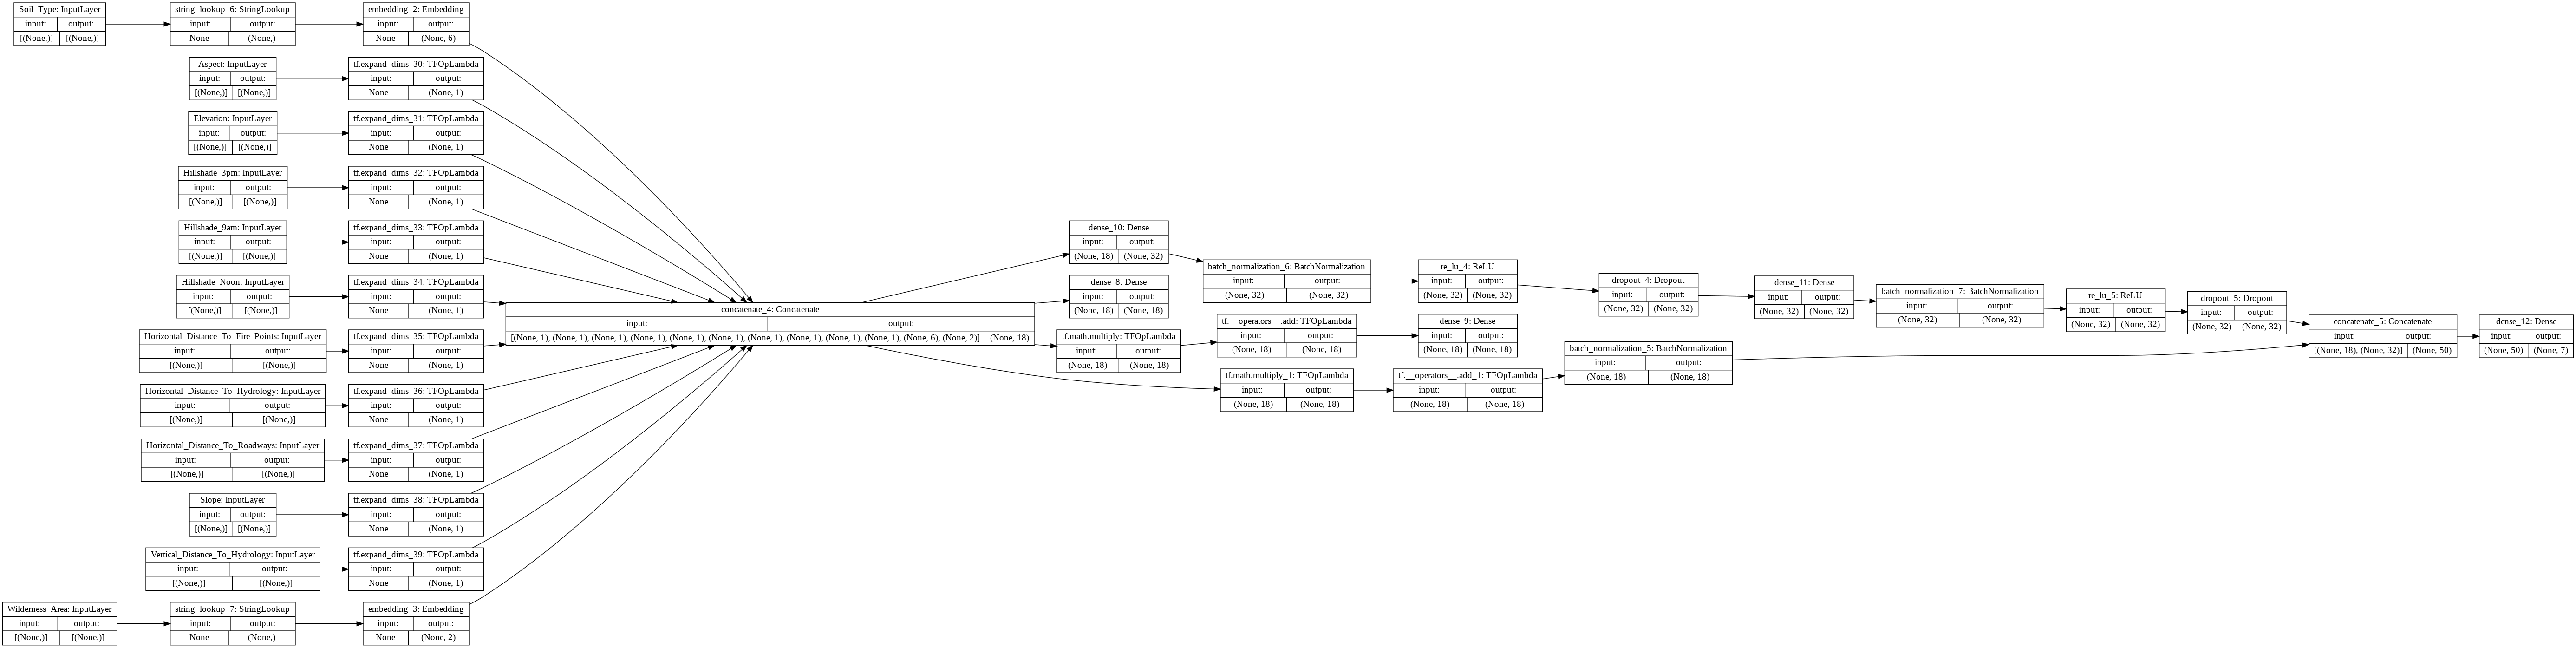

In [ ]:

def create_deep_and_cross_model():

    inputs = create_model_inputs()
    x0 = encode_inputs(inputs, use_embedding=True)

    cross = x0
    for _ in hidden_units:
        units = cross.shape[-1]
        x = layers.Dense(units)(cross)
        cross = x0 * x + cross
    cross = layers.BatchNormalization()(cross)

    deep = x0
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        deep = layers.Dropout(dropout_rate)(deep)

    merged = layers.concatenate([cross, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


deep_and_cross_model = create_deep_and_cross_model()
keras.utils.plot_model(deep_and_cross_model, show_shapes=True, rankdir="LR")

Let's run it:

In [ ]:
run_experiment(deep_and_cross_model)

Start training the model...
Epoch 1/50
1864/1864 [==============================] - 11s 5ms/step - loss: 0.9163 - sparse_categorical_accuracy: 0.6394
Epoch 2/50
1864/1864 [==============================] - 8s 4ms/step - loss: 0.6034 - sparse_categorical_accuracy: 0.7392
Epoch 3/50
1864/1864 [==============================] - 8s 4ms/step - loss: 0.5816 - sparse_categorical_accuracy: 0.7474
Epoch 4/50
1864/1864 [==============================] - 8s 4ms/step - loss: 0.5689 - sparse_categorical_accuracy: 0.7531
Epoch 5/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5603 - sparse_categorical_accuracy: 0.7566
Epoch 6/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5528 - sparse_categorical_accuracy: 0.7598
Epoch 7/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5469 - sparse_categorical_accuracy: 0.7623
Epoch 8/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5409 - sparse_categorical_accuracy: 0.7656
Epo

The deep and cross model achieves ~81% test accuracy.

### Using the Model for Feature Extraction

Keras models allow you to create a feature extraction version of the model. See [this tutorial](https://keras.io/getting_started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer-feature-extraction) for more reasons. Basically, by feeding in model inputs and outputs as just the layer you want to receive the features for, we create a model that can extract any layer we want. In the code below we get one big batch of data from the test, and then pick up the very first datapoint to serve as test to extract features. 

In [ ]:
# repurpose our dataloading code for one sample
sample = get_dataset_from_csv(test_data_file, 1)

In [ ]:
# iterate through the dataset and pick up what point you want. We just pick up the first and then break
for data in sample.as_numpy_iterator():
  data_point = data
  break

In [ ]:
# look at the data
dict(data_point[0])


{'Aspect': array([142], dtype=int32),
 'Elevation': array([3197], dtype=int32),
 'Hillshade_3pm': array([138], dtype=int32),
 'Hillshade_9am': array([232], dtype=int32),
 'Hillshade_Noon': array([238], dtype=int32),
 'Horizontal_Distance_To_Fire_Points': array([778], dtype=int32),
 'Horizontal_Distance_To_Hydrology': array([201], dtype=int32),
 'Horizontal_Distance_To_Roadways': array([4084], dtype=int32),
 'Slope': array([8], dtype=int32),
 'Soil_Type': array([b'soil_type_23'], dtype=object),
 'Vertical_Distance_To_Hydrology': array([18], dtype=int32),
 'Wilderness_Area': array([b'area_type_3'], dtype=object)}

In [ ]:
# create a version of the model to extract the second last layer because the one below that will just be a probability distribution for the classes
extractor_second_last_layer = keras.Model(inputs=deep_and_cross_model.inputs,
                        outputs=[deep_and_cross_model.layers[-2].output])

In [ ]:
extractor_last_layer = keras.Model(inputs=deep_and_cross_model.inputs,
                        outputs=[deep_and_cross_model.layers[-1].output])

In [ ]:
# create a version of the model to extract all layers
extractor = keras.Model(inputs=deep_and_cross_model.inputs,
                        outputs=[layer.output for layer in deep_and_cross_model.layers])

Pass our data through the second last layer extractor. We see a numpy array representing the layer after having passed the data!

In [ ]:
extractor_second_last_layer(dict(data_point[0]))

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[ 0.27952367,  1.5206957 , -2.189806  , -0.6322489 ,  2.059984  ,
         0.38888216,  0.16476515, -1.6843402 , -0.472713  ,  0.11952984,
        -1.2534332 ,  0.14436941,  0.6124527 , -1.2192774 ,  0.431974  ,
        -0.6818445 ,  1.4196906 , -0.46549374,  0.        ,  0.        ,
         0.        ,  0.97390354,  0.05285877,  0.        ,  0.        ,
         0.        ,  1.2155619 ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.0889153 ,  0.37813616,  0.28987134,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.2368112 ,  0.36190996,  1.1349317 ,  0.        ,
         0.        ,  0.        ,  0.        ,  3.2551403 ,  0.7069885 ]],
      dtype=float32)>

We'd expect this layer to be just a distribution of the probabilities of it belonging to each class.

In [ ]:
extractor_last_layer(dict(data_point[0]))

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[5.9861392e-01, 4.0075368e-01, 1.7141748e-12, 5.8524230e-24,
        8.2915168e-09, 2.9055578e-14, 6.3236599e-04]], dtype=float32)>

Simlarly, we can extract any layer which we find useful. We can expect these layers to have useful information to do with identifying forest covers embedded in them,

### Conclusion

You can use Keras Preprocessing Layers to easily handle categorical features
with different encoding mechanisms, including one-hot encoding and feature embedding.
In addition, different model architectures — like wide, deep, and cross networks
— have different advantages, with respect to different dataset properties.
You can explore using them independently or combining them to achieve the best result
for your dataset.

## Convolutional Neural Networks (CNN)

Convolutional NNs (CNN) work well in domains where individual observations are locally correlated. For example, if one pixel in an image is black, then surrounding pixels are also likely to be black. This means that CNNs are well suited to image, natural language, and time-series. The basic premise is that CNN pre-processes the data through a set of filters, called convolutions. After going through several layers of filters the result is fed into an MLP. The training process optimizes the filters and the MLP for the problem at hand. The major benefit is that the filters allow the architecture as a whole to be time, rotation and skew dependent, so long as those examples exist in the training data. Today, massive, deep CNNs are the state of the art for image and video related tasks. They have also performed well on network data, where topological proximity (i.e., nodes are only influenced by those with which they are linked).

In the code below, we use the Keras documentation example for creating a convolutional neural network that receives 99% accuracy on the popular MNIST dataset (a handwritten digits classification dataset) ([Keras - Chollet, 2020](https://keras.io/examples/vision/mnist_convnet/)) 

The MNIST dataset is one the earliest datasets used in computer vision and machine learning.


### Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


NameError: ignored

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

NameError: ignored

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build the model

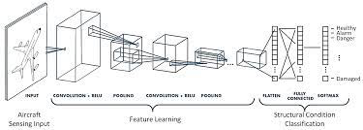

In our model, we pass the input through two rounds of convolutional layers followed by max pooling. After this, we flatten our output and dropout some nodes before passing it to the final layer. 

There are two new terms here: **convolutional layers**, and **maxpooling**. 

After passing through a **convolutional layer**, the image becomes abstracted to a feature map, also called an activation map, with shape: (number of inputs) x (feature map height) x (feature map width) x (feature map channels). A convolutional layer within a CNN generally has the following attributes:
- Convolutional filters/kernels defined by a width and height (hyper-parameters) 
- The number of input channels and output channels (hyper-parameters). One layer's input channels must equal the number of output channels (also called depth) of its input.
- Additional hyperparameters of the convolution operation, such as: padding, stride, and dilation. Convolutional layers convolve the input and pass its result to the next layer. This is similar to the response of a neuron in the visual cortex to a specific stimulus. Each convolutional neuron processes data only for its receptive field.

**Max pooling** is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned. This is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation. Max pooling is done by applying a max filter to (usually) non-overlapping subregions of the initial representation. Example: Let's say we have a 4x4 matrix representing our initial input. Let's say, as well, that we have a 2x2 filter that we'll run over our input. We'll have a stride of 2 (meaning the (dx, dy) for stepping over our input will be (2, 2)) and won't overlap regions.


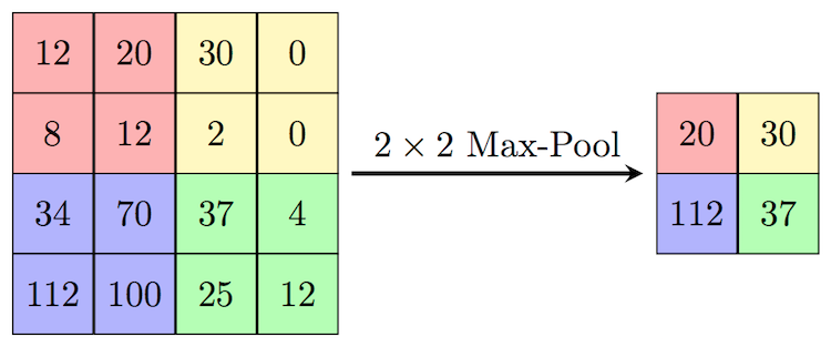

For more information, our reading and this [blog post](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/) should be helpful.

You can find lots of examples of code for CNN based classifier models online. Our example below is a very small scale version of the state of models being used, which we will explore in more detail in the chapters on images.

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)



In [ ]:
# quick summary
model.summary()

### Train the model

We set our batch size, number of epochs, and the loss, optimiser and metrics.

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

### Evaluate the trained model

Even though its a fairly small model, it has mastered being able to tell different digits apart!

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

### Feature extraction

Like before, we can use this model to extract features.

In [ ]:
extractor = keras.Model(inputs=model.inputs,
                        outputs=[model.layers[-2].output])

We reshape our input to be able to fit the model, by making it one row with the image. 

In [ ]:
x_test[0].shape

In [ ]:
input = x_test[0].reshape((1, 28, 28, 1))

In [ ]:
extractor(input).numpy()

We saw in our last weeks tutorial how we used pre-trained CNN models to extract features - this is usually a better way to go about feature extraction, unless you are training very domain specific data and need your own model for features.

A tip for deciding which model you want to use - see what images the pre-trained model has been trained on, and if your image domain is similar, then you are good to go! If you are vectorising a very different kind of image, consider training your own model. (duh).

## Graph Neural Networks

We will now look at Graph Neural Networks, which are powerful deep learning models for modelling graphs and networks. We will be following the documentation from PyToch Geometric, which is a leading package for Graph Neural Models. Graph Neural Networks are very initimately linked to Convolutional Neural Networks.

https://pytorch-geometric.readthedocs.io/en/latest/

[karate club tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing)

### Set-up

In [ ]:
# Install required packages.
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric

# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt


def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

     |████████████████████████████████| 2.6MB 11.8MB/s 
     |████████████████████████████████| 1.5MB 11.5MB/s 
     |████████████████████████████████| 215kB 12.6MB/s 
     |████████████████████████████████| 235kB 19.3MB/s 
     |████████████████████████████████| 2.2MB 28.4MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 


### Introduction: Hands-on Graph Neural Networks


Here, **Graph Neural Networks (GNNs)** aim to generalize classical deep learning concepts to irregular structured data (in contrast to images or texts) and to enable neural networks to reason about objects and their relations.

This is done by following a simple **neural message passing scheme**, where node features $\mathbf{x}_v^{(\ell)}$ of all nodes $v \in \mathcal{V}$ in a graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$ are iteratively updated by aggregating localized information from their neighbors $\mathcal{N}(v)$:

$$
\mathbf{x}_v^{(\ell + 1)} = f^{(\ell + 1)}_{\theta} \left( \mathbf{x}_v^{(\ell)}, \left\{ \mathbf{x}_w^{(\ell)} : w \in \mathcal{N}(v) \right\} \right)
$$

This tutorial will introduce you to some fundamental concepts regarding deep learning on graphs via Graph Neural Networks based on the **[PyTorch Geometric (PyG) library](https://github.com/rusty1s/pytorch_geometric)**.
PyTorch Geometric is an extension library to the popular deep learning framework [PyTorch](https://pytorch.org/), and consists of various methods and utilities to ease the implementation of Graph Neural Networks.

Following [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), let's dive into the world of GNNs by looking at a simple graph-structured example, the well-known [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). This graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club. Here, we are interested in detecting communities that arise from the member's interaction.

PyTorch Geometric provides an easy access to this dataset via the [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) subpackage:

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


After initializing the [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) dataset, we first can inspect some of its properties.
For example, we can see that this dataset holds exactly **one graph**, and that each node in this dataset is assigned a **34-dimensional feature vector** (which uniquely describes the members of the karate club).
Furthermore, the graph holds exactly **4 classes**, which represent the community each node belongs to.

Let's now look at the underlying graph in more detail:

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(edge_index=[2, 156], train_mask=[34], x=[34, 34], y=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Each graph in PyTorch Geometric is represented by a single [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) object, which holds all the information to describe its graph representation.
We can print the data object anytime via `print(data)` to receive a short summary about its attributes and their shapes:
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
We can see that this `data` object holds 4 attributes:
(1) The `edge_index` property holds the information about the **graph connectivity**, *i.e.*, a tuple of source and destination node indices for each edge.
PyG further refers to (2) **node features** as `x` (each of the 34 nodes is assigned a 34-dim feature vector), and to (3) **node labels** as `y` (each node is assigned to exactly one class).
(4) There also exists an additional attribute called `train_mask`, which describes for which nodes we already know their community assigments.
In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and the task is to infer community assignment for the remaining nodes.

The `data` object also provides some **utility functions** to infer some basic properties of the underlying graph.
For example, we can easily infer whether there exists isolated nodes in the graph (*i.e.* there exists no edge to any node), whether the graph contains self-loops (*i.e.*, $(v, v) \in \mathcal{E}$), or whether the graph is undirected (*i.e.*, for each edge $(v, w) \in \mathcal{E}$ there also exists the edge $(w, v) \in \mathcal{E}$).

Let us now inspect the `edge_index` property in more detail:

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

By printing `edge_index`, we can further understand how PyG represents graph connectivity internally.
We can see that for each edge, `edge_index` holds a tuple of two node indices, where the first value describes the node index of the source node and the second value describes the node index of the destination node of an edge.

This representation is known as the **COO format (coordinate format)** commonly used for representing sparse matrices.
Instead of holding the adjacency information in a dense representation $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$, PyG represents graphs sparsely, which refers to only holding the coordinates/values for which entries in $\mathbf{A}$ are non-zero.

We can further visualize the graph by converting it to the `networkx` library format, which implements, in addition to graph manipulation functionalities, powerful tools for visualization:

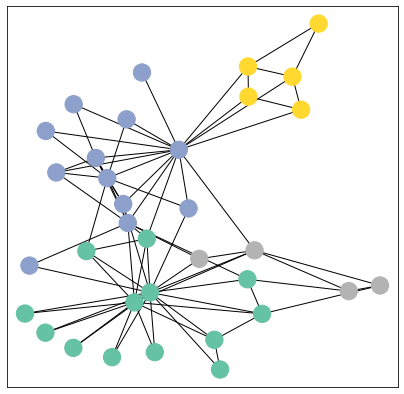

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

### Implementing Graph Neural Networks

Ater learning about PyG's data handling, it's time to implement our first Graph Neural Network!

For this, we will use on of the most simple GNN operators, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)), which is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.

PyG implements this layer via [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), which can be executed by passing in the node feature representation `x` and the COO graph connectivity representation `edge_index`.

With this, we are ready to create our first Graph Neural Network by defining our network architecture in a `torch.nn.Module` class:

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Here, we first initialize all of our building blocks in `__init__` and define the computation flow of our network in `forward`.
We first define and stack **three graph convolution layers**, which corresponds to aggregating 3-hop neighborhood information around each node (all nodes up to 3 "hops" away).
In addition, the `GCNConv` layers reduce the node feature dimensionality to $2$, *i.e.*, $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$. Each `GCNConv` layer is enhanced by a [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) non-linearity.

After that, we apply a single linear transformation ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) that acts as a classifier to map our nodes to 1 out of the 4 classes/communities.

We return both the output of the final classifier as well as the final node embeddings produced by our GNN.
We proceed to initialize our final model via `GCN()`, and printing our model produces a summary of all its used sub-modules.


### Embedding the Karate Club Network

Let's take a look at the node embeddings produced by our GNN.
Here, we pass in the initial node features `x` and the graph connectivity information `edge_index` to the model, and visualize its 2-dimensional embedding.

Embedding shape: [34, 2]


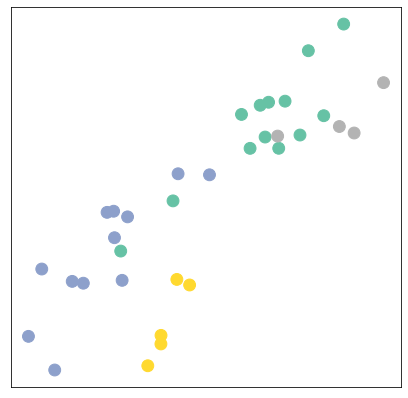

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

Remarkably, even before training the weights of our model, the model produces an embedding of nodes that closely resembles the community-structure of the graph.
Nodes of the same color (community) are already closely clustered together in the embedding space, although the weights of our model are initialized **completely at random** and we have not yet performed any training so far!
This leads to the conclusion that GNNs introduce a strong inductive bias, leading to similar embeddings for nodes that are close to each other in the input graph.

### Training on the Karate Club Network

But can we do better? Let's look at an example on how to train our network parameters based on the knowledge of the community assignments of 4 nodes in the graph (one for each community):

Since everything in our model is differentiable and parameterized, we can add some labels, train the model and observse how the embeddings react.
Here, we make use of a semi-supervised or transductive learning procedure: We simply train against one node per class, but are allowed to make use of the complete input graph data.

Training our model is very similar to any other PyTorch model.
In addition to defining our network architecture, we define a loss critertion (here, [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) and initialize a stochastic gradient optimizer (here, [`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).
After that, we perform multiple rounds of optimization, where each round consists of a forward and backward pass to compute the gradients of our model parameters w.r.t. to the loss derived from the forward pass.
If you are not new to PyTorch, this scheme should appear familar to you. 
Otherwise, the PyTorch docs provide [a good introduction on how to train a neural network in PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).

Note that our semi-supervised learning scenario is achieved by the following line:
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
While we compute node embeddings for all of our nodes, we **only make use of the training nodes for computing the loss**.
Here, this is implemented by filtering the output of the classifier `out` and ground-truth labels `data.y` to only contain the nodes in the `train_mask`.

Let us now start training and see how our node embeddings evolve over time (best experienced by explicitely running the code):

<IPython.core.display.Javascript object>

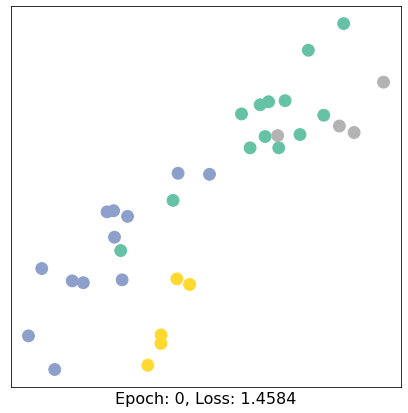

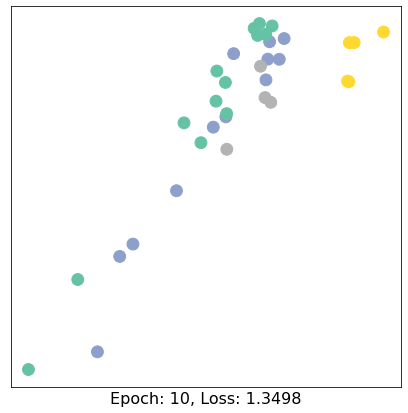

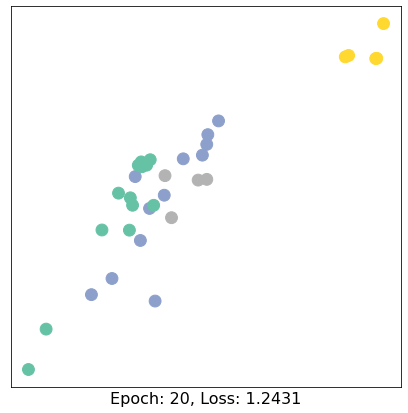

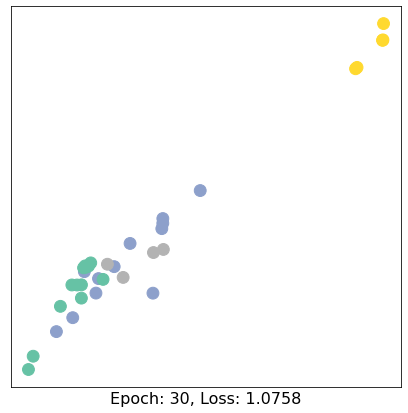

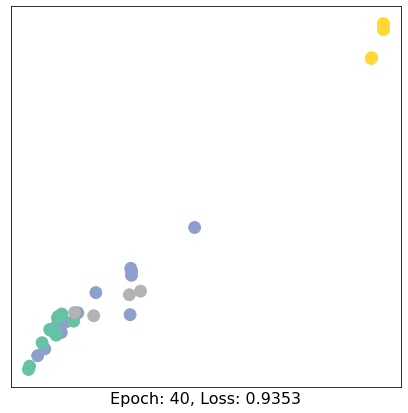

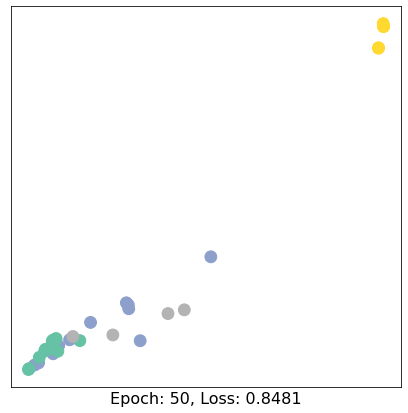

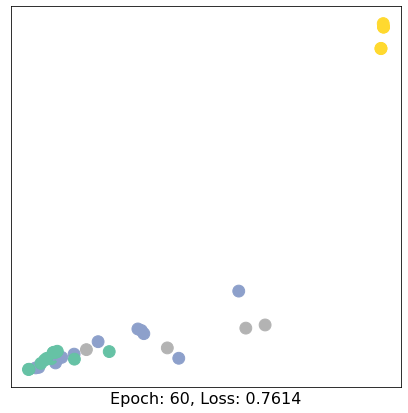

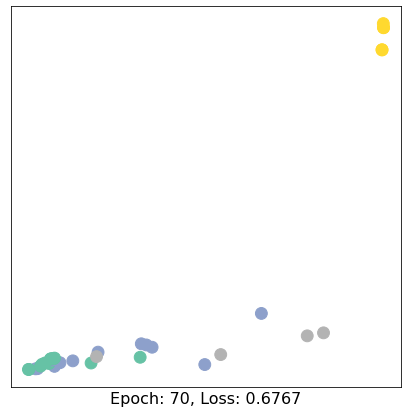

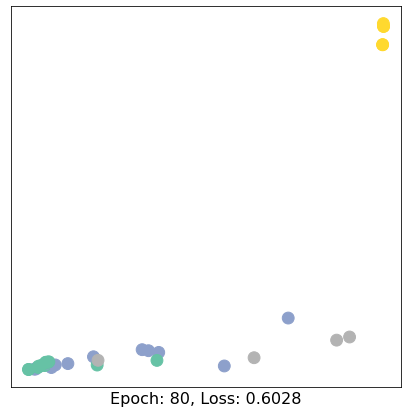

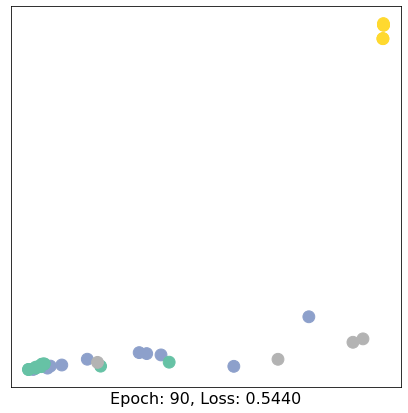

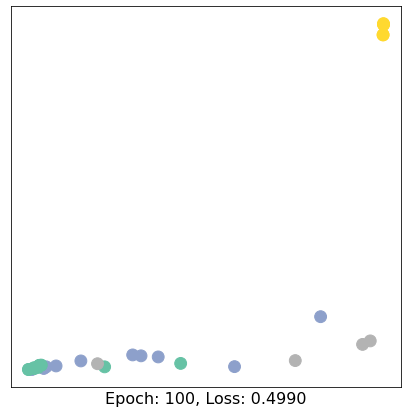

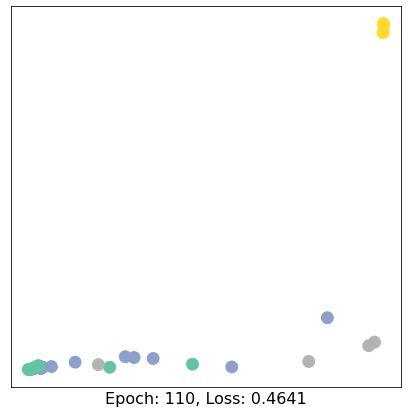

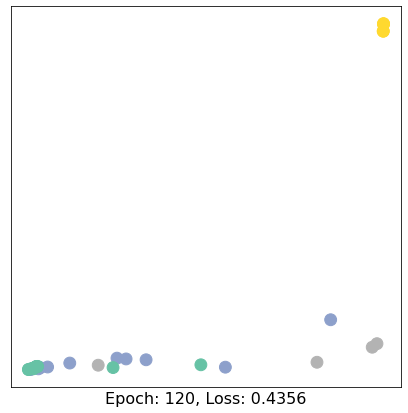

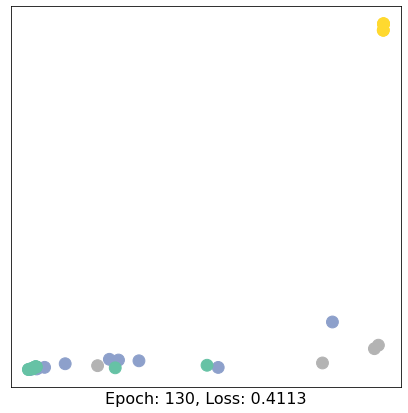

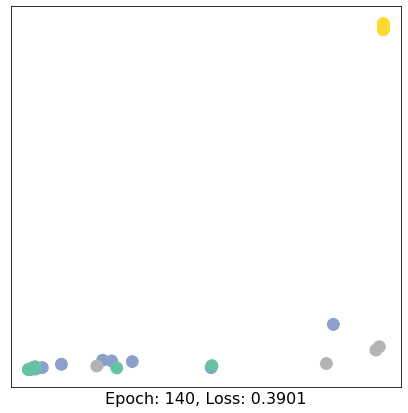

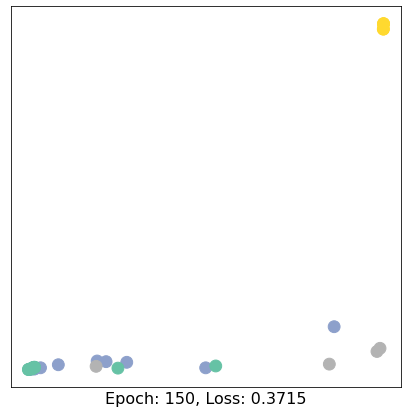

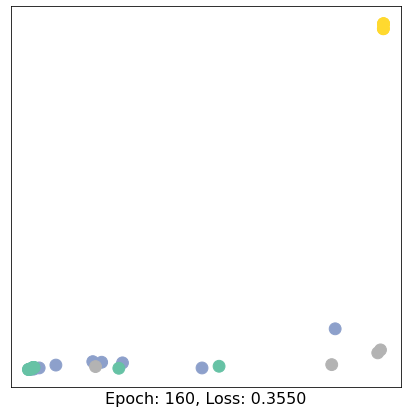

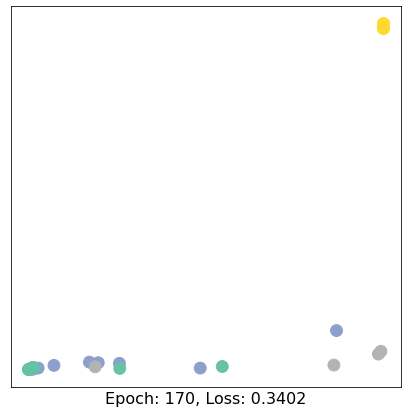

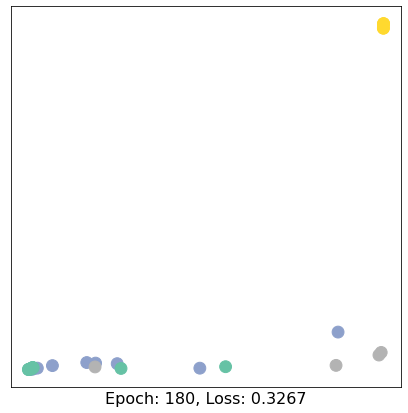

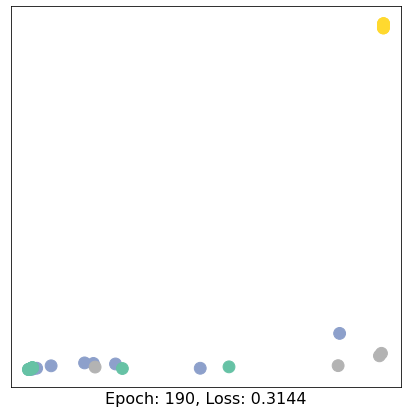

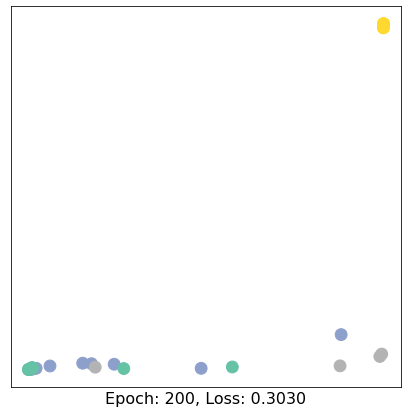

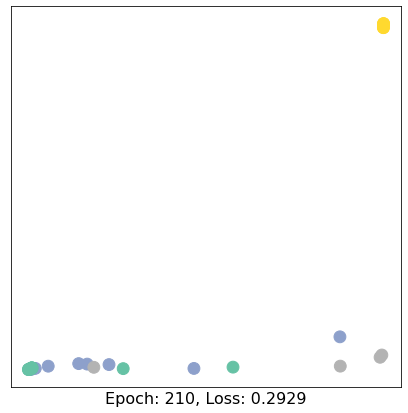

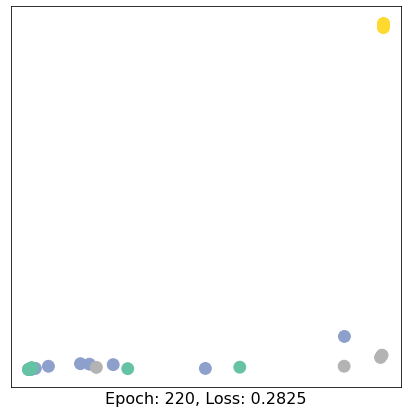

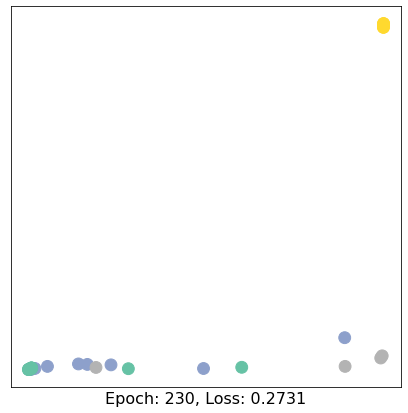

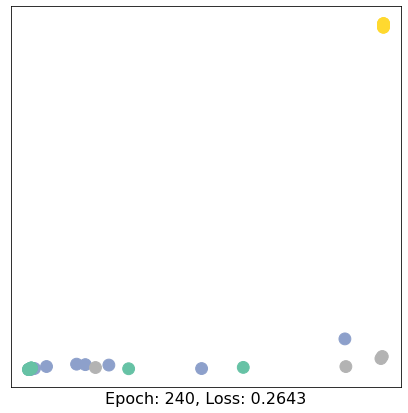

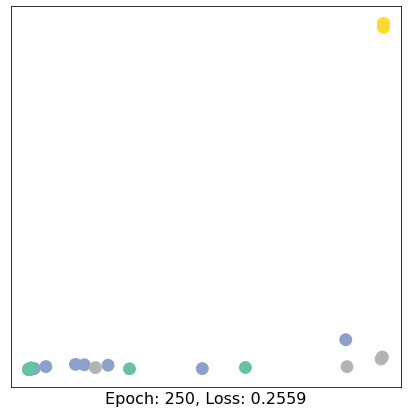

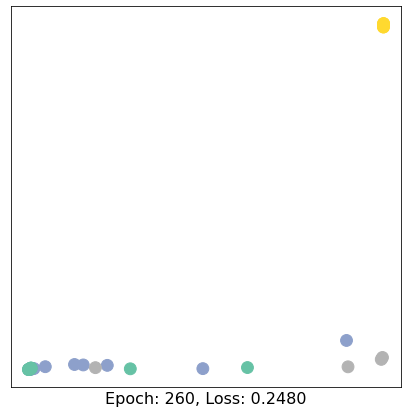

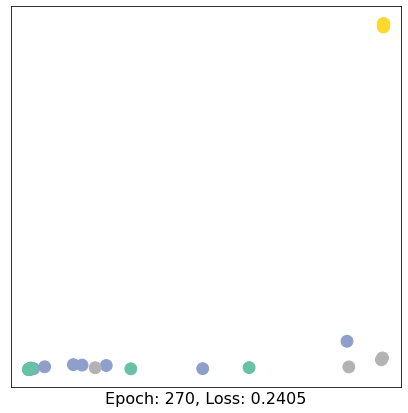

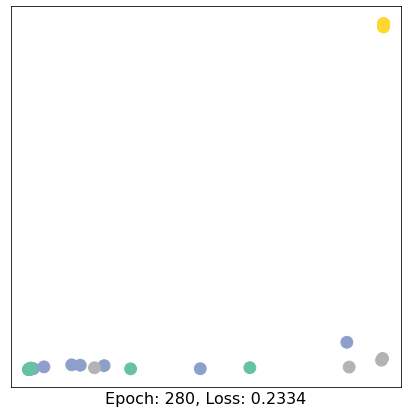

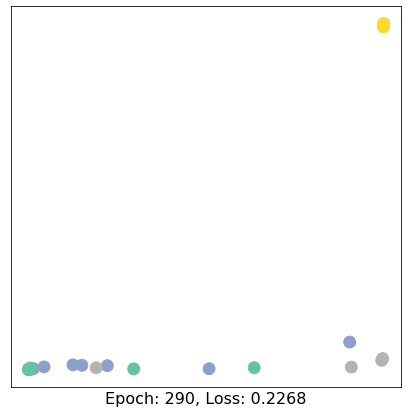

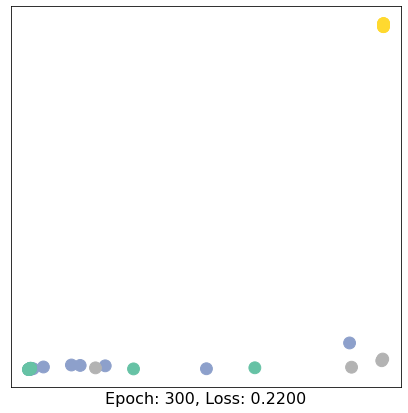

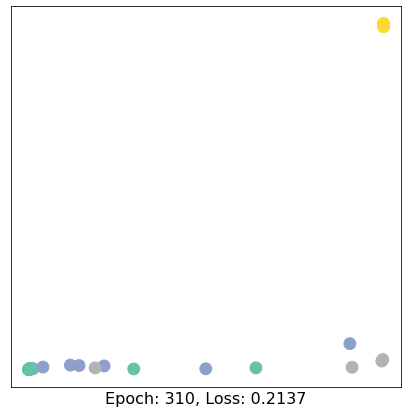

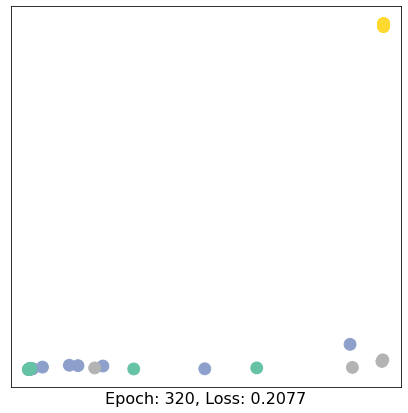

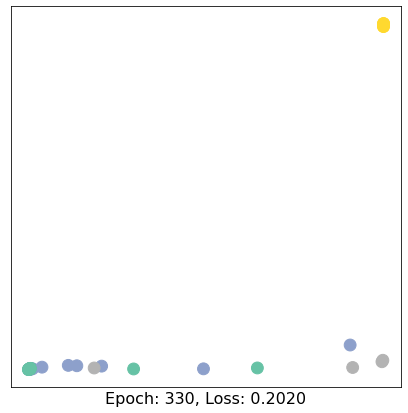

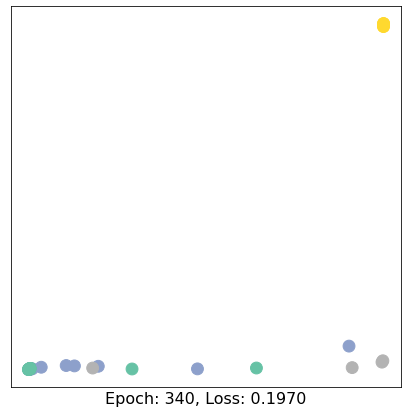

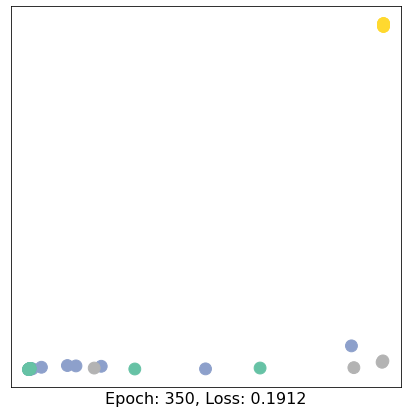

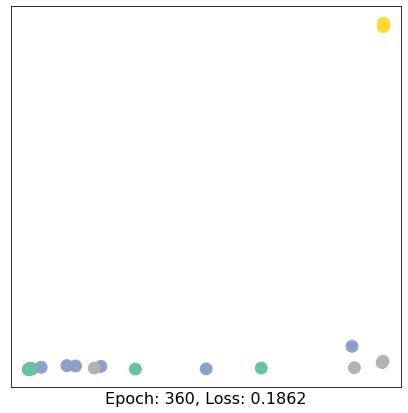

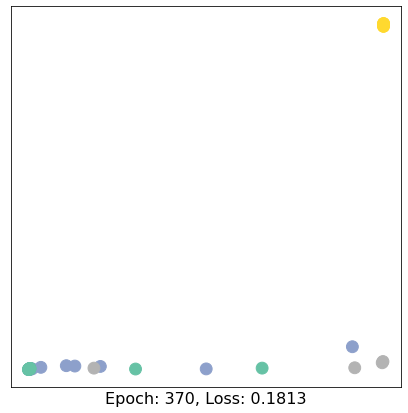

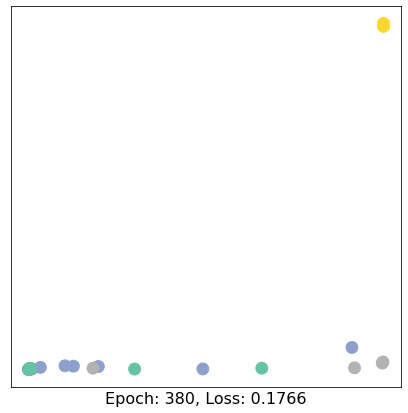

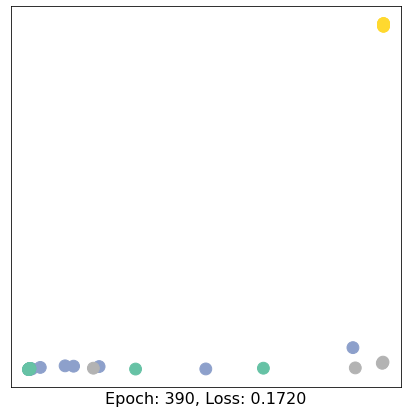

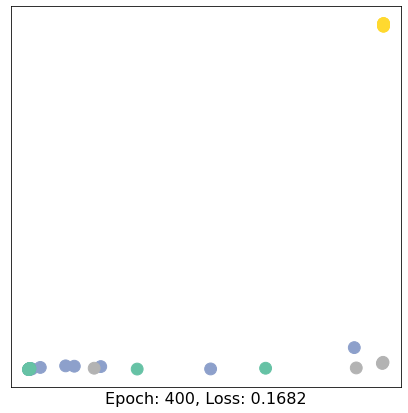

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

As one can see, our 3-layer GCN model manages to linearly separate the communities and classify most of the nodes correctly.

Furthermore, we did this all with a few lines of code, thanks to the PyTorch Geometric library which helped us out with data handling and GNN implementations.

### Conclusion

This concludes the first introduction into the world of GNNs and PyTorch Geometric.
In the follow-up optional tutorial, you will learn how to achieve state-of-the-art classification results on a number of real-world graph datasets.

Optional: 
[Node Classification with Graph Neural Networks](https://colab.research.google.com/drive/14OvFnAXggxB8vM4e8vSURUp1TaKnovzX)

## Recurrent Neural Networks (RNN)

Recurrent NNs (RNN) are a class of architectures that feed back the result of one time-step into the input of the next. Given data that is temporally correlated, like text or time-series, RNNs are able to “remember” the past and leverage this information to make decisions. RNNs are notoriously hard to train because of the feedback loop, and Long-short-term memory (LSTM) and gated recurrent units (GRU) improve upon RNNs by incorporating gates to dump the previous “history” and cut the feedback loop. 

Even though RNNs in its most basic form are not used in practice anymore, it is worth noting how they are structured and used in both the popular libaries.

These are two popular blog posts which take us through the structure and uses of RNNs.

- [The Unreasonable Effectiveness of Recurrent Neural
   Network](https://karpathy.github.io/2015/05/21/rnn-effectiveness/)
   shows a bunch of real life examples
-  [Understanding LSTM
   Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
   is about LSTMs specifically but also informative about RNNs in
   general

#### PyTorch

We will be constructing a simple RNN using PyTorch, using the code adapted from their [introductory tutorial](https://pytorch.org/tutorials/beginner/former_torchies/nnft_tutorial.html).

In [ ]:
class RNN(nn.Module):
    # you can also accept arguments in your model constructor
    def __init__(self, data_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        input_size = data_size + hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)

    def forward(self, data, last_hidden):
        input = torch.cat((data, last_hidden), 1)
        hidden = self.i2h(input)
        output = self.h2o(hidden)
        return hidden, output

In [ ]:
rnn = RNN(50, 20, 10)

This is what the created model looks like. The recurrent nature can be seen in the output of the hidden layer going back to itself.

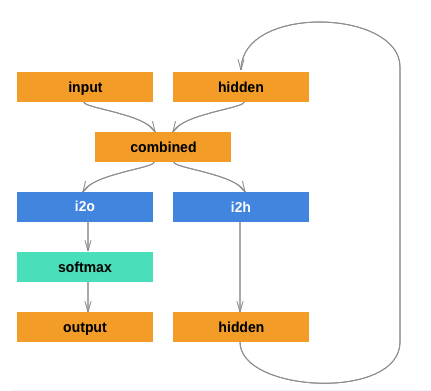

This RNN forms the base of the Character RNN based Name classification task in this [PyTorch tutorial](
https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html). To quickly see how this model would run on random data:

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
batch_size = 10
TIMESTEPS = 5

In [ ]:
# Create some fake data
batch = torch.randn(batch_size, 50)
hidden = torch.zeros(batch_size, 20)
target = torch.zeros(batch_size, 10)

In [ ]:
loss = 0
for t in range(TIMESTEPS):
    # yes! you can reuse the same network several times,
    # sum up the losses, and call backward!
    # in this line, we are passing the batch and hidden values to the RNN, and the new hidden layer and output is being returned
    hidden, output = rnn(batch, hidden)
    loss += loss_fn(output, target)
loss.backward()

In [ ]:
hidden.shape

torch.Size([10, 20])

In [ ]:
output.shape

torch.Size([10, 10])

#### Keras

Keras offers many options for RNN layers: https://keras.io/api/layers/recurrent_layers/

We will be exploring these in more detail in the next two sections.

Vanilla RNNs are rarely used for NLP tasks, but can be useful in understanding how the concept of recurrence can be useful. [Here](https://pytorch.org/tutorials/intermediate/char_rnn_generation_tutorial.html) is an example of generating names using a character level RNN. 

We will explore these more complex RNN based architectures below!

## Long Short Term Memory (LSTM)

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by [Hochreiter & Schmidhuber (1997)](http://www.bioinf.jku.at/publications/older/2604.pdf). LSTMs are explicitly designed to avoid the long-term dependency problem, and does this with a "cell state" which decides what information to remember and what to throw away. These properties of LSTMs make it especially ammenable for language based tasks, and sequential tasks. 

The following lines of code includes Keras code which uses a bi-directional LSTM on the popular IMDB movie review dataset for sentiment analysis

https://keras.io/examples/nlp/bidirectional_lstm_imdb/

In [ ]:
max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

### Build the model

In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________


### Load the IMDB movie review sentiment data

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 Training sequences
25000 Validation sequences


### Train and evaluate the model

We've seen this kind of setup before - only its a binary classification task, so be careful to choose the right loss!

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))


Epoch 1/2
782/782 [==============================] - 65s 77ms/step - loss: 0.4784 - accuracy: 0.7477 - val_loss: 0.4807 - val_accuracy: 0.7620
Epoch 2/2
782/782 [==============================] - 59s 75ms/step - loss: 0.2334 - accuracy: 0.9093 - val_loss: 0.3549 - val_accuracy: 0.8646


Our model does okay, with a validation accuracy of 86%. Similar to past examples, we can extract features using this model, creating something akin to a document vector.

### Feature Extraction

In [ ]:
extractor = keras.Model(inputs=model.inputs,
                        outputs=[model.layers[-2].output])

In [ ]:
input = x_val[0].reshape(1, 200)

In [ ]:
extractor(input).numpy()

array([[-2.2972912e-01, -2.3805001e-01, -1.9081286e-01, -3.5885371e-02,
        -3.1889060e-01, -4.9322765e-02,  1.7017785e-01,  2.7061290e-01,
         6.5944060e-03, -1.6057506e-01, -5.2431829e-02,  1.4147910e-01,
         4.9923277e-01, -1.3443123e-01, -5.0565511e-01,  2.6541620e-01,
        -6.4171255e-01,  4.2155422e-02, -4.3173319e-01, -4.8179206e-01,
         2.1919565e-01, -4.9190587e-01, -4.5009780e-01, -4.0101013e-01,
         3.9166149e-02,  4.7609046e-01,  1.7208397e-01, -1.4022349e-01,
         1.1230196e-01,  1.5007399e-01,  5.0125752e-02, -1.2914580e-01,
        -4.7125125e-01, -6.3405806e-01,  3.9767981e-01,  1.8011300e-01,
         6.0781342e-01, -2.3641558e-01,  4.8868728e-01, -4.2678069e-02,
        -3.7765908e-01, -2.1140853e-01, -4.3970078e-02,  5.1300788e-01,
        -7.8047389e-01,  4.1893604e-01, -6.2796317e-02,  2.5534171e-01,
         9.8210976e-02, -3.1738052e-01,  5.4211634e-01, -2.8591046e-01,
         3.5203519e-01, -7.4652262e-02,  7.3340142e-01, -4.60710

## Autoencoders and Variational Autoencoders

Auto-encoders traditionally have an architecture that tapers towards the middle, like an hour-glass. The goal is to reproduce some input data as best it can, given the constraint of the taper (i.e size of the inner layers). For example, if there were two neurons in the middle and the corresponding reproduction was acceptable, then you could use the outputs of the two neurons to represent your data in 2D, instead of the raw data, however many features or dimensions it possessed. In other words, it is a form of compression. Many architectures incorporate auto-encoders as a form of automated feature extraction.


(Adapted from [Keras](https://keras.io/examples/timeseries/timeseries_anomaly_detection/), by
 [pavithrasv](https://github.com/pavithrasv)).



### Timeseries anomaly detection using an Autoencoder

In this example, we are going to train an autoencoder to generate a time series, and then catch anamolies by looking at where the model did worst at recreating the trend (i.e., missed an exception in the data!). This is an example of a model that can be useful by learning the trend (or average) temporal behaviour of the data.


#### Introduction

This script demonstrates how you can use a reconstruction convolutional
autoencoder model to detect anomalies in timeseries data.

#### Setup

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

#### Load the data

We will use the [Numenta Anomaly Benchmark(NAB)](
https://www.kaggle.com/boltzmannbrain/nab) dataset. It provides artifical
timeseries data containing labeled anomalous periods of behavior. Data are
ordered, timestamped, single-valued metrics.

We will use the `art_daily_small_noise.csv` file for training and the
`art_daily_jumpsup.csv` file for testing. The simplicity of this dataset
allows us to demonstrate anomaly detection effectively.

In [ ]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

#### Quick look at the data

In [ ]:
print(df_small_noise.head())

print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


#### Visualize the data
##### Timeseries data without anomalies

We will use the following data for training.

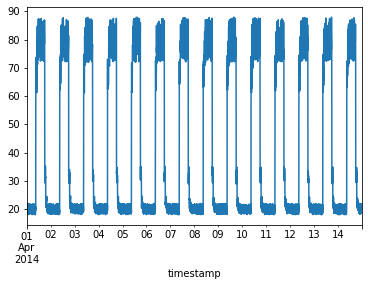

In [ ]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()

#### Timeseries data with anomalies

We will use the following data for testing and see if the sudden jump up in the
data is detected as an anomaly.

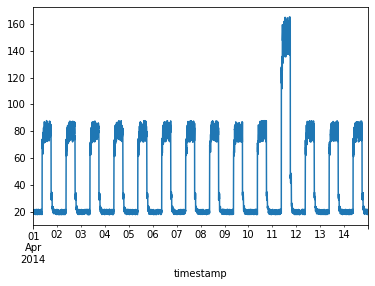

In [ ]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()

#### Prepare training data

Get data values from the training timeseries data file and normalize the
`value` data. We have a `value` for every 5 mins for 14 days.

-   24 * 60 / 5 = **288 timesteps per day**
-   288 * 14 = **4032 data points** in total

In [ ]:

# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


#### Create sequences
Create sequences combining `TIME_STEPS` contiguous data values from the
training data.

In [ ]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3744, 288, 1)


#### Build a model

We will build a convolutional reconstruction autoencoder model. The model will
take input of shape `(batch_size, sequence_length, num_features)` and return
output of the same shape. In this case, `sequence_length` is 288 and
`num_features` is 1.

Here, you can see that we convolutional layers followed by convolutional transpose layers - this is the "hourglass" in action.

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 144, 32)           256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 144, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 72, 16)            3600      
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 144, 16)           1808      
_________________________________________________________________
dropout_8 (Dropout)          (None, 144, 16)           0         
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 288, 32)           3616      
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr (None, 288, 1)           

#### Train the model

Please note that we are using `x_train` as both the input and the target
since this is a reconstruction model.

What does this mean? We are trying to recreate the data with the model, so we are trying to learn the generative process for the time-series.

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 1s 15ms/step - loss: 0.7976 - val_loss: 0.1269
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.1060 - val_loss: 0.0406
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0615 - val_loss: 0.0336
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0511 - val_loss: 0.0288
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - val_loss: 0.0264
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0413 - val_loss: 0.0250
Epoch 7/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0381 - val_loss: 0.0234
Epoch 8/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.0223
Epoch 9/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0330 - val_loss: 0.0212
Epoch 10/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0303 - val_loss: 0.0201
Epoch 11/50
27/27 

Let's plot training and validation loss to see how the training went.

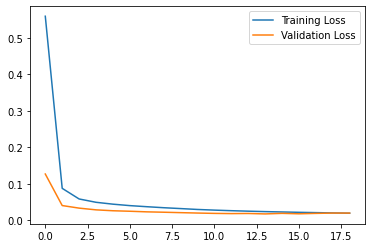

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

#### Detecting anomalies

We will detect anomalies by determining how well our model can reconstruct
the input data.


1.   Find MAE loss on training samples.
2.   Find max MAE loss value. This is the worst our model has performed trying
to reconstruct a sample. We will make this the `threshold` for anomaly
detection.
3.   If the reconstruction loss for a sample is greater than this `threshold`
value then we can infer that the model is seeing a pattern that it isn't
familiar with. We will label this sample as an `anomaly`.


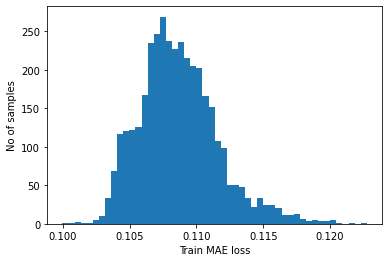

Reconstruction error threshold:  0.12274590048150724


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

#### Compare recontruction

Just for fun, let's see how our model has recontructed the first sample.
This is the 288 timesteps from day 1 of our training dataset.

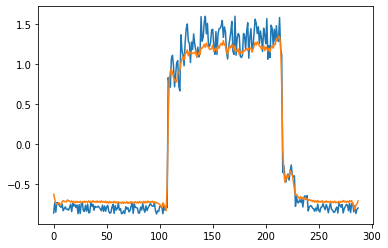

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

Not bad - our model does ok in trying to match up the original data.

#### Prepare test data

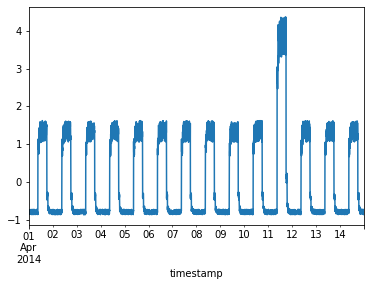

Test input shape:  (3744, 288, 1)


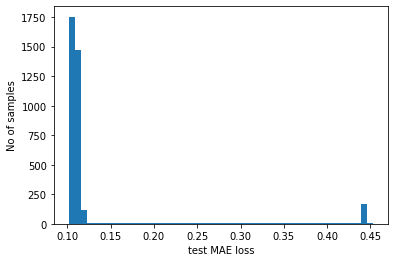

Number of anomaly samples:  402
Indices of anomaly samples:  (array([1652, 1654, 1655, 1658, 1659, 2522, 2523, 2701, 2702, 2703, 2704,
       2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715,
       2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726,
       2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737,
       2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748,
       2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759,
       2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770,
       2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781,
       2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792,
       2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803,
       2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814,
       2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825,
       2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2

In [ ]:

def normalize_test(values, mean, std):
    values -= mean
    values /= std
    return values


df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

#### Plot anomalies

We now know the samples of the data which are anomalies. With this, we will
find the corresponding `timestamps` from the original test data. We will be
using the following method to do that:

Let's say time_steps = 3 and we have 10 training values. Our `x_train` will
look like this:

- 0, 1, 2
- 1, 2, 3
- 2, 3, 4
- 3, 4, 5
- 4, 5, 6
- 5, 6, 7
- 6, 7, 8
- 7, 8, 9

All except the initial and the final time_steps-1 data values, will appear in
`time_steps` number of samples. So, if we know that the samples
[(3, 4, 5), (4, 5, 6), (5, 6, 7)] are anomalies, we can say that the data point
5 is an anomaly.

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

Let's overlay the anomalies on the original test data plot.

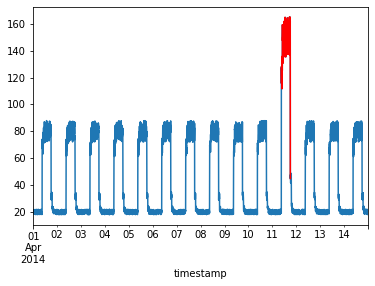

In [ ]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

So here we've seen an example where we train a model to recreate a time series, and search for anamolies by looking at where the model had the highest error in trying to recreate the data. Such a setup is useful whenever we are trying to detect any anamolies in trends or structures!

### Convolutional Variational AutoEncoder (VAE) trained on MNIST digits.

The convolutional VAE is a method for visualising images in a lower dimensional space.

Adapted from [Keras](https://keras.io/examples/generative/vae/), by [fchollet](https://twitter.com/fchollet)
Convolutional Variational AutoEncoder (VAE) trained on MNIST digits.

#### Setup

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#### Create a sampling layer

In [ ]:

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


#### Build the encoder

Notice how the encoder layer has two conv layers, and the decode layer has two conv transpose layers.

In [ ]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 32)   320         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 7, 7, 64)     18496       conv2d_2[0][0]                   
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 3136)         0           conv2d_3[0][0]                   
____________________________________________________________________________________________

#### Build the decoder

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_16 (Dense)             (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

#### Define the VAE as a `Model` with a custom `train_step`

In [ ]:

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


#### Train the VAE

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
547/547 [==============================] - 4s 5ms/step - loss: 256.2079 - reconstruction_loss: 209.5064 - kl_loss: 3.1353
Epoch 2/30
547/547 [==============================] - 3s 5ms/step - loss: 191.6901 - reconstruction_loss: 186.5816 - kl_loss: 3.2313
Epoch 3/30
547/547 [==============================] - 3s 5ms/step - loss: 184.8255 - reconstruction_loss: 176.6971 - kl_loss: 4.0887
Epoch 4/30
547/547 [==============================] - 3s 5ms/step - loss: 169.2088 - reconstruction_loss: 162.0784 - kl_loss: 5.7245
Epoch 5/30
547/547 [==============================] - 3s 5ms/step - loss: 165.0151 - reconstruction_loss: 157.9855 - kl_loss: 6.0708
Epoch 6/30
547/547 [==============================] - 3s 5ms/step - loss: 162.4798 - reconstruction_loss: 155.7548 - kl_loss: 6.1918
Epoch 7/30
547/547 [==============================] - 3s 5ms/step - loss: 160.5620 - reconstruction_loss: 154.1484 - kl_loss: 6.2856
Epoch 8/30
547/547 [==============================] - 3s 5ms/step - l

#### Display a grid of sampled digits

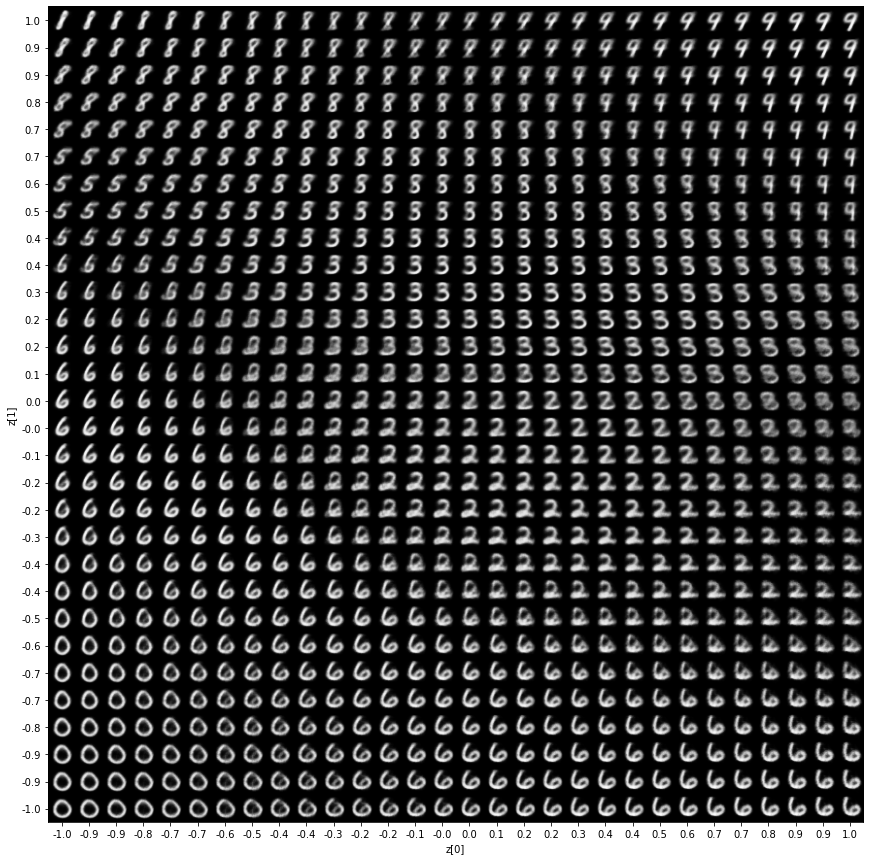

In [ ]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

#### Display how the latent space clusters different digit classes

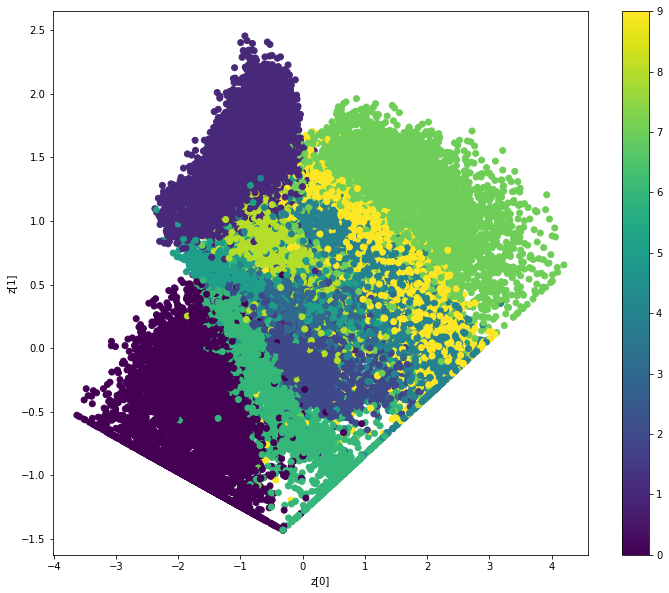

In [ ]:

def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

# Links and Resources for other Deep Learning models

In this section we link to other topics and associated packages or tutorials which can be adapted to our use.

## Encoders and Decoders

[Encoder Decoder Model for Sequence Prediction using Keras](
https://machinelearningmastery.com/develop-encoder-decoder-model-sequence-sequence-prediction-keras/)

## Self Organising Maps

Quick Self Organising Maps - [QuickSOM python package](https://pypi.org/project/quicksom/)

Fast Self Organising Maps - [FastSOM python package](https://kireygroup.github.io/fastsom/)

## Generative Adversarial Networks

[CycleGAN](https://keras.io/examples/generative/cyclegan/)

## Attention and Transformers

[PyTorch Seq2Seq tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html)

Intro to BERT and Transformers: https://github.com/huggingface/transformers

### Sequence to Sequence Modelling with LSTMs

[Learning addition of two integers in strings with RNNs (Keras)](
https://keras.io/examples/nlp/addition_rnn/)

# Homework Exercise

We saw in this notebook some of the most popular neural network models, starting from the multi-layer perceptron and travelling through RNNs, CNNs, deep and cross models, and deep and wide models, all the way to GNNs and Autoencoders. Each of these models were trained for a very different task and setting. RNNs (and LSTMs) deal with text well (and sequences), CNNs with images and when set up in different ways, also time series data. Deep and cross models work best with multi-modal categorical and numberical data, and GNNs, as the name suggests, work best with Graphs.

In this homework, you will be building your own neural model for your datasets, and work on a prediction task as well as feature extration. 

You will receive bonus points if you use a social scientifc dataset or a dataset related to your final project.

There are a total of 5 questions, and you will be graded for 2 out of 5 of them.

**1)** Build a neural network model implemented in this notebook for a dataset of your choice. You can use the model to perform a predictive task, such as classification or numerical prediction, or for data visualisation and exploration, such as embedding or dimensionality reduction.

# **Visualizing text of personality types on Twitter using deep contextual embeddings**

I have calculated the contextual embeddings for Twitter likes of two different personality types using BERT and then visualized this space after reducing via UMAP. This is part of my final project dataset!

**Importing dataset**

In [ ]:
import pandas as pd

In [ ]:
!pip install transformers
import transformers

     |████████████████████████████████| 2.1MB 12.7MB/s 
     |████████████████████████████████| 3.3MB 57.1MB/s 
     |████████████████████████████████| 870kB 49.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=798fe32a2f2e43b2d4ad6cf42a08fe7efbdab6d3da65190403f5fa771f2561f8
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ofile = open('/content/drive/MyDrive/MBTI_Data/personality_likes_large.csv', errors= 'ignore')
df = pd.read_csv(ofile)

personality_type1 = 'INTP'
personality_type2 = 'ESTP'

size = min(len(df[df['type']==personality_type1]), len(df[df['type']==personality_type2]))
print(size)

edf = df[df['type']==personality_type1].sample(size)
edf = edf.append(df[df['type']==personality_type2].sample(size))
edf

107


,Unnamed: 0,liked_by,text,type,extravert,intuitive,thinking,judging,NT,SF,NF,ST,NJ,NP,SJ,SP
47,47,727133601398018050,@spooky_sushi658 I just cant bring myself to w...,ESTP,1,0,1,0,0,0,0,1,0,0,0,1
88,88,981106945745563648,. . https://t.co/PfbI7sFEL0 htt...,ESTP,1,0,1,0,0,0,0,1,0,0,0,1
28,28,582948424,Millions of Americas are struggling to pay for...,ESTP,1,0,1,0,0,0,0,1,0,0,0,1
91,91,1271788394125897729,mano o Onision (aquele cara que viralizou com ...,ESTP,1,0,1,0,0,0,0,1,0,0,0,1
99,99,1301838825501544448,\n# # # https://t.co/ldclRX3rDA \n \n\n \...,ESTP,1,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,2696,16310514,"Farkettiniz mi ""Melih Bulu ok iyi bir yneticid...",INTP,0,1,1,0,1,0,0,0,0,1,0,0
2622,2622,20329588,"Im here live, Im not a cat, says lawyer after ...",INTP,0,1,1,0,1,0,0,0,0,1,0,0
2834,2834,84143587,Having done a thing fifteen years ago is not t...,INTP,0,1,1,0,1,0,0,0,0,1,0,0
2822,2822,175419846,To: President Joseph Biden\nFrom: Every Americ...,INTP,0,1,1,0,1,0,0,0,0,1,0,0


**Importing BERT Model from Huggingface and using it to embed text via the CLS token:**

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
def embed(sent):
  input = tokenizer.encode_plus(text= sent, max_length = 512, truncation = True, add_special_tokens = True, return_tensors="pt")
  output = model(**input)
  last_hidden_state = output.last_hidden_state
  return(last_hidden_state[0,0,:].detach().numpy())


In [ ]:
edf['embedding'] = edf['text'].apply(embed)



NameError: ignored

**1b)** If possible, use this model to extract features from your data-points. Once you extract these features, convert these to a low dimensional space and visualise them (e.g PCA, t-SNE, UMAP). If it is not possible, explain why.

**Visualizing in lower dimensional space using UMAP**

In [ ]:
!pip install umap-learn
import umap
reducer = umap.UMAP()
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
data = np.stack(edf['embedding'].values, axis = 0 )

#data = StandardScaler.fit_transform(data)
data

array([[-0.04064133,  0.12558825,  0.6484262 , ..., -0.39350697,
         0.5475514 ,  0.17587008],
       [-0.22682245,  0.04466359,  0.15431626, ...,  0.02251087,
         0.3098802 ,  0.32988304],
       [ 0.01013411, -0.1422652 ,  0.44343656, ...,  0.09084018,
         0.37919915,  0.04834148],
       ...,
       [-0.03669057, -0.15260231,  0.22089012, ..., -0.17976533,
         0.41536978,  0.3166432 ],
       [-0.30258474, -0.61711127, -0.06281213, ..., -0.36536655,
         0.71925646,  0.12073047],
       [-0.13838185, -0.14826022,  0.14942431, ..., -0.26992363,
         0.44729516,  0.09555982]], dtype=float32)

In [ ]:
embedding = reducer.fit_transform(data)
embedding.shape

(214, 2)

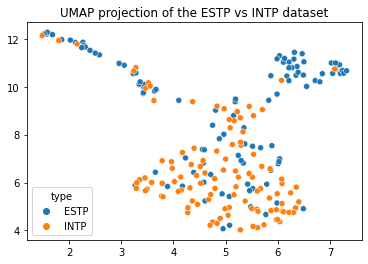

In [ ]:
ax1 = sns.scatterplot(
    x =  embedding[:, 0],
    y = embedding[:, 1],
    hue=edf['type'], legend = True)

ax1.set_title('UMAP projection of the ESTP vs INTP dataset' )
plt.show()

In [ ]:
explanation = 'something' #@param {type:"string"}

**2)** Build a neural network model implemented in this notebook for a dataset of your choice. You can use the model to perform a predictive task, such as classification or numerical prediction, or for data visualisation and exploration, such as embedding or dimensionality reduction. This model should be a different kind of model from your responses in the previous question.

**2b)** If possible, use this model to extract features from your data-points. Once you extract these features, convert these to a low dimensional space and visualise them (e.g PCA, t-SNE, UMAP). If it is not possible, explain why.

In [ ]:
explanation = 'something' #@param {type:"string"}

**3)** Build a neural network model **not** implemented in this notebook for a dataset of your choice. You may refer to any of our links and resources or use any resources of your choice. You can use the model to perform a predictive task, such as classification or numerical prediction, or for data visualisation and exploration, such as embedding or dimensionality reduction. 